Connecting to Mongodb database to the Port: 27017 and Importing data from the database NOSQLProject and collection supplychaindata

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import xgboost as xgb
import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil
import tensorflow as tf
import statsmodels.api as sm
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from keras import Sequential
from keras.layers import Dense
from IPython.core import display as ICD

#Hiding the warnings
warnings.filterwarnings('ignore') 

In [19]:
df = pd.read_csv("supplychain.csv", encoding= 'latin-1')
df= pd.DataFrame(df)
df.head(5)

In [20]:
print('1) Number of columns are : ',df.shape[1])
print('2) Number of rows are : ',df.shape[0])
print('3) Total number of data-points :',df.size)
numerical_features = [f for f in df.columns if df[f].dtypes!='O']
print('4) Count of Numerical Features :',len(numerical_features))
cat_features = [c for c in df.columns if df[c].dtypes=='O']
print('5) Count of Categorical Features :',len(cat_features))

1) Number of columns are :  53
2) Number of rows are :  180519
3) Total number of data-points : 9567507
4) Count of Numerical Features : 29
5) Count of Categorical Features : 24


# **Data preprocessing** 

Number of Rows and columns in dataset

In [21]:
df.shape

(180519, 53)

In [22]:
#Columns in the Dataset
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

Dataset Sample

In [23]:
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [25]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


Check for Null values in the dataset

In [26]:
np.sum(df.isna())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Here we have observed null vlaues in the columns Order Zipcode,Customer zipcode, Customer Lname

Filling the null values in the columns Zipcode with 0

In [27]:
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)
df['Order Zipcode'] = df['Order Zipcode'].fillna(0)

Getting the full name of the customer by combining the FIrstname  and last name column in the dataset

In [28]:
df['Customer Full Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

In [29]:
df=df.drop(['Customer Fname','Customer Lname'],axis=1)

In [30]:
df['Customer Full Name'] = df['Customer Full Name'].str.lower()

In the dataset given all the mail ids are quoted as xxxxx so this is not useful so removing theat from the dataset

In [31]:
df=df.drop(['Customer Email'],axis=1)

IN the datset we have observed that the product status column includes only one value that is 0 so this is also not useful so removing this 

In [32]:
df=df.drop(['Product Status'],axis=1)

Customer Password is required for analysis so removing that from the data

In [33]:
df=df.drop(['Customer Password'],axis=1)

We will use the Customer address and zipcode for location of shipment so removing the latitude and longitude from the column

In [34]:
df=df.drop(['Latitude','Longitude'],axis=1)

Product image is not required for analyzing the delivery and fraud so removing that columns

In [35]:
df=df.drop(['Product Image'],axis=1)

In [36]:
df=df.drop(['Category Id','Customer Id','Department Id','Order Id','Order Item Id'],axis=1)

In [37]:
df['Market'].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

In [38]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product Description', 'Product Name', 'Product Price',
       'shipping date (DateOrders)', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

Corelation between the data columns

In [39]:
correlation_matrix = df.corr()
print(correlation_matrix)


                               Days for shipping (real)  \
Days for shipping (real)                       1.000000   
Days for shipment (scheduled)                  0.515880   
Benefit per order                             -0.005101   
Sales per customer                             0.001757   
Late_delivery_risk                             0.401415   
Customer Zipcode                               0.000114   
Order Customer Id                              0.003432   
Order Item Cardprod Id                        -0.000859   
Order Item Discount                            0.002231   
Order Item Discount Rate                       0.001467   
Order Item Product Price                       0.002185   
Order Item Profit Ratio                       -0.004638   
Order Item Quantity                           -0.000811   
Sales                                          0.001962   
Order Item Total                               0.001757   
Order Profit Per Order                        -0.005101 

Heatmap for the corelation

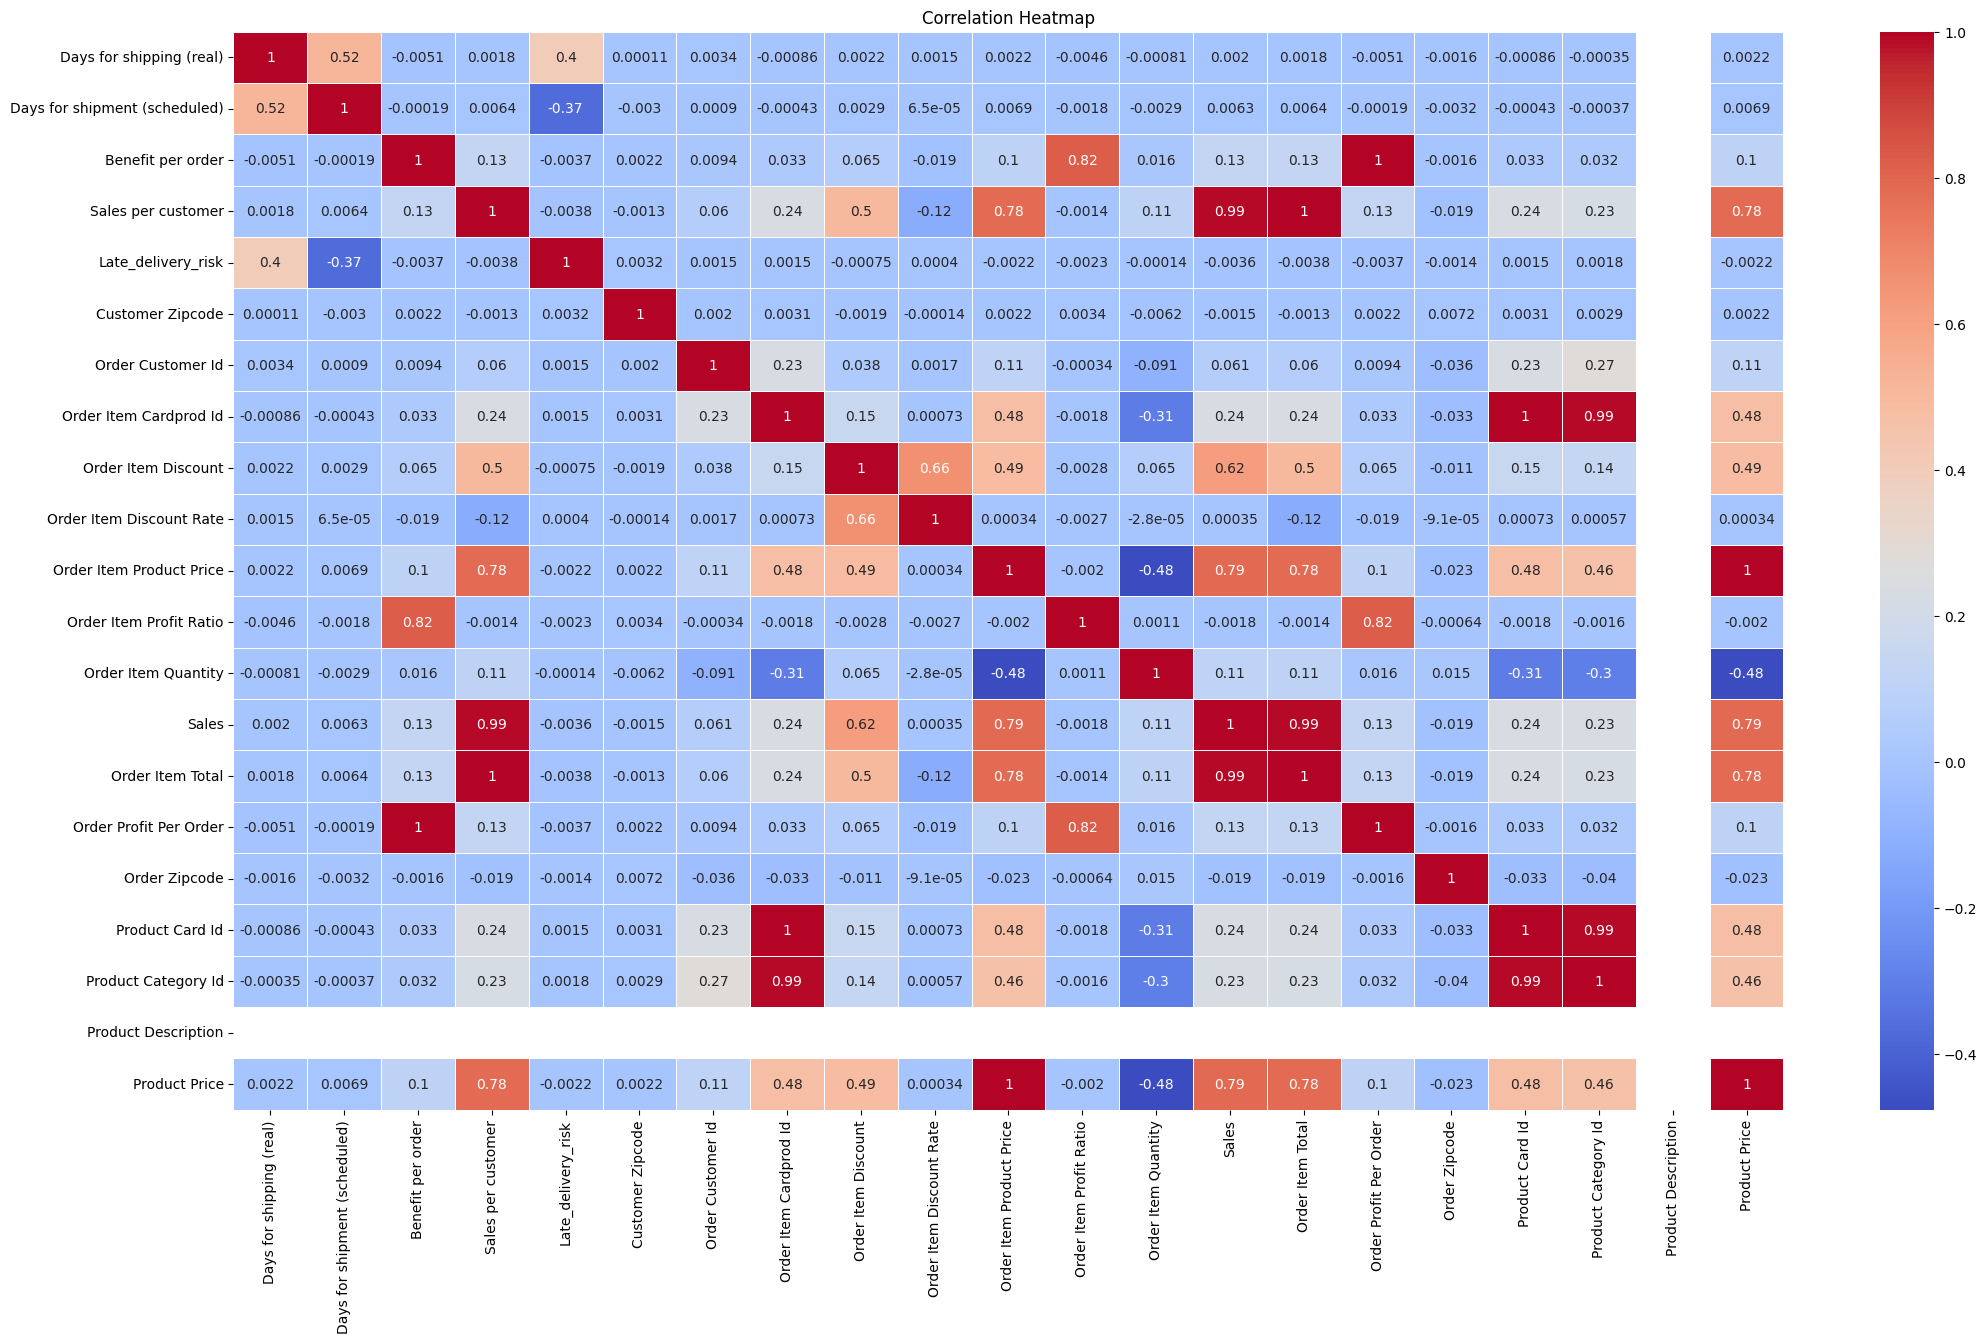

In [40]:
plt.figure(figsize=(25, 14))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

From here we can see that the columns 'Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname','Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders) have no effect on the order delivery 

Insights from Heatmap:
1. Columns that are similar with same values but with different metadata (duplicate columns)

[Benefit per order], Order Profit per order

[Sales per customer], Sales, Order Item Total

[Category ID], Product Category ID, Order Customer ID, Order Item Category ID, Product card ID,

[Order Item Product Price],Product Price

2. Unwanted features(null or less correlated values)

Product Description
Product Status

Removing the duplicate columns

In [41]:
df=df.drop(['Product Category Id','Order Customer Id','Product Card Id','Product Category Id','Order Profit Per Order','Order Item Cardprod Id','Order Item Total','Sales','Order Item Product Price','Order Item Profit Ratio',],axis=1)

## **Exploratory data analysis**

Analysing Sales

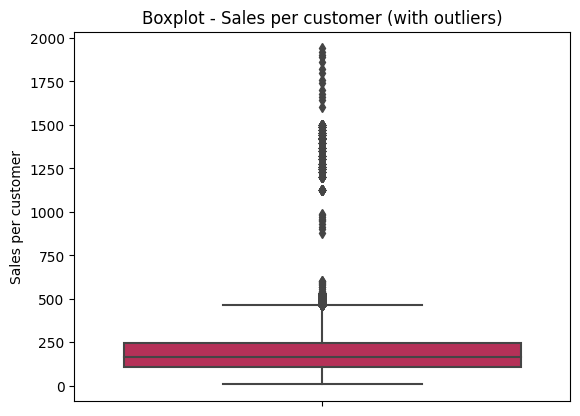

In [42]:
sns.boxplot(data = df, y = 'Sales per customer', palette = 'rocket')
plt.title('Boxplot - Sales per customer (with outliers)');
plt.xlabel('');

Here we can seee that there are many outliers in the sales per customer column.
FInding the outlier in Sales per customer column

In [43]:
Q1 = df['Sales per customer'].quantile(.25)
Q3 = df['Sales per customer'].quantile(.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q3 - 1.5*(IQR)
print(UL)
print(LL)

461.92998880000005
32.86999899999998


The calculated Upper Limit (UL) is approximately 461.93, and the Lower Limit (LL) is approximately 32.87. Any data point in the 'Sales per customer' column that is higher than 461.93 or lower than 32.87 would be considered an outlier based on the 1.5 * IQR rule.

Removing the outliers from the Sales per customer column

In [44]:
df['Sales per customer'] = np.where(df['Sales per customer'] < 32.869, 32, np.where(df['Sales per customer'] > 461.930, 461, df['Sales per customer']))

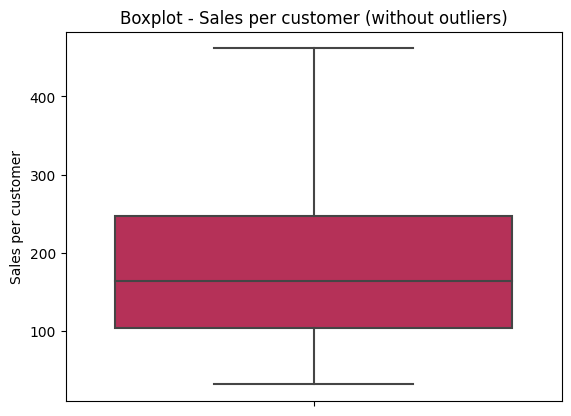

In [45]:
sns.boxplot(data = df, y = 'Sales per customer', palette = 'rocket')
plt.title('Boxplot - Sales per customer (without outliers)');
plt.xlabel('');

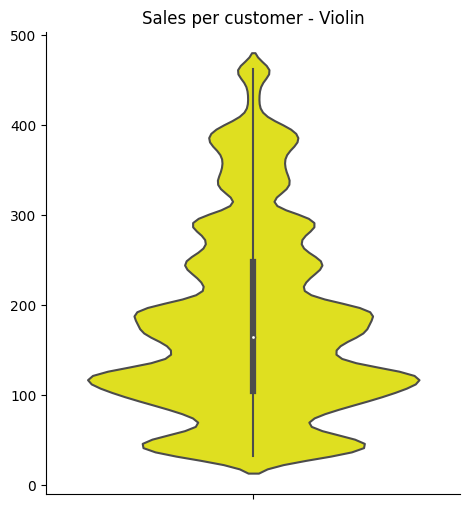

In [263]:
sns.catplot(data = df, y = 'Sales per customer', kind = 'violin', color = 'yellow')
plt.title('Sales per customer - Violin');
plt.ylabel('');

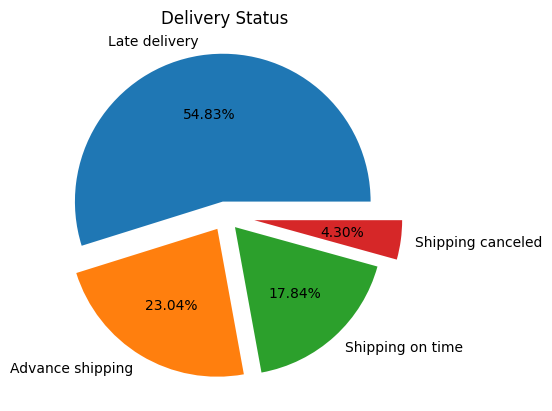

In [46]:
pie = df['Delivery Status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = [0.1, 0.1, 0.1, 0.2])
plt.title('Delivery Status')
plt.ylabel('');

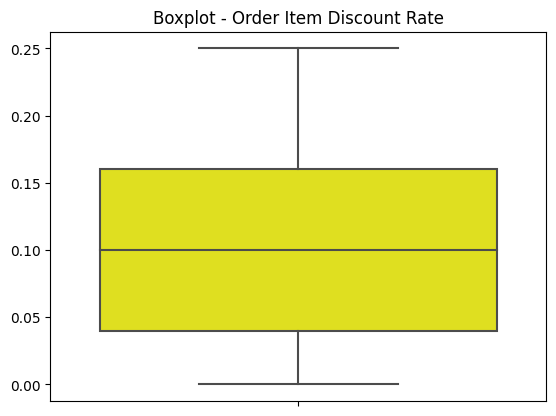

In [266]:
sns.boxplot(data = df, y = 'Order Item Discount Rate', color = 'yellow')
plt.title('Boxplot - Order Item Discount Rate');
plt.xlabel('');
plt.ylabel('');


In [47]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Quantity', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Description', 'Product Name', 'Product Price',
       'shipping date (DateOrders)', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

<AxesSubplot:>

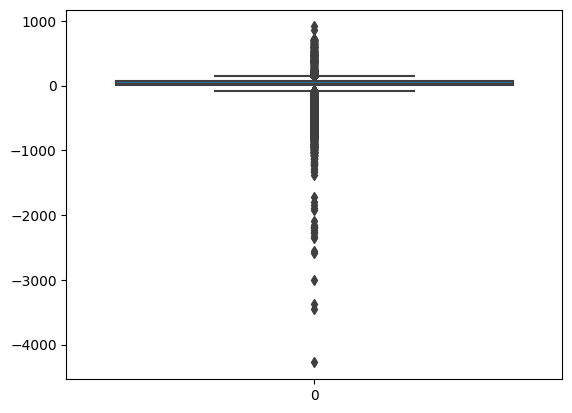

In [48]:
sns.boxplot(df['Benefit per order'])

In [49]:
Q1 = df['Benefit per order'].quantile(.25)
Q3 = df['Benefit per order'].quantile(.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q3 - 1.5*(IQR)
print(UL)
print(LL)

151.50000762500002
-21.900001525000008


In [50]:
df['Benefit per order'] = np.where(df['Benefit per order'] < -21.900, -21, np.where(df['Benefit per order'] > 151.500, 151, df['Benefit per order']))

<AxesSubplot:>

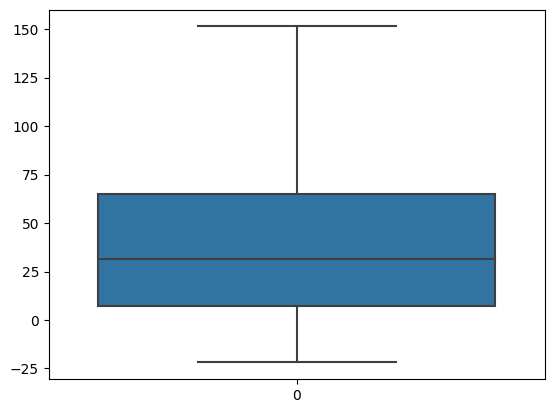

In [51]:
sns.boxplot(df['Benefit per order'])

<AxesSubplot:title={'center':'Total sales for all regions'}, xlabel='Order Region'>

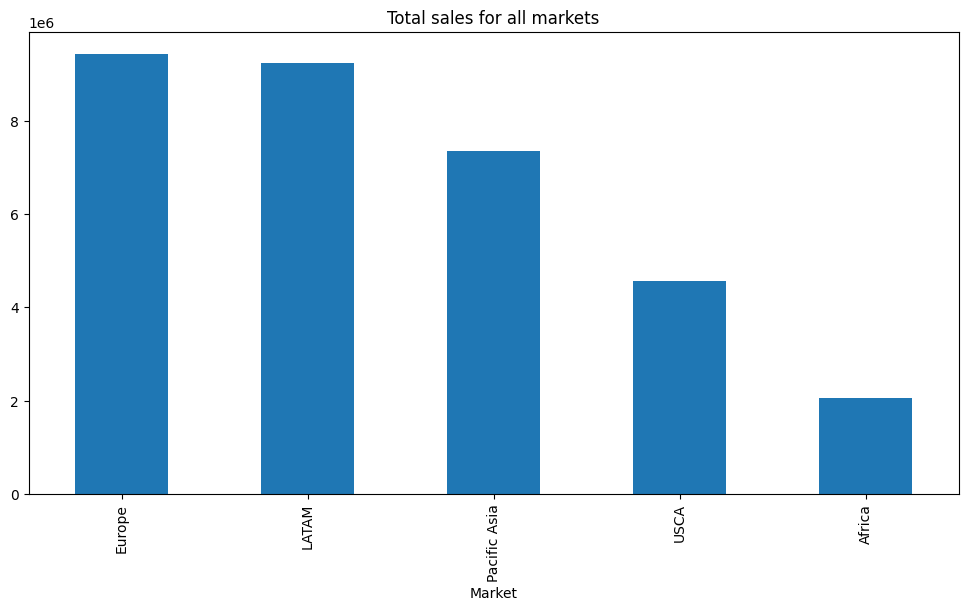

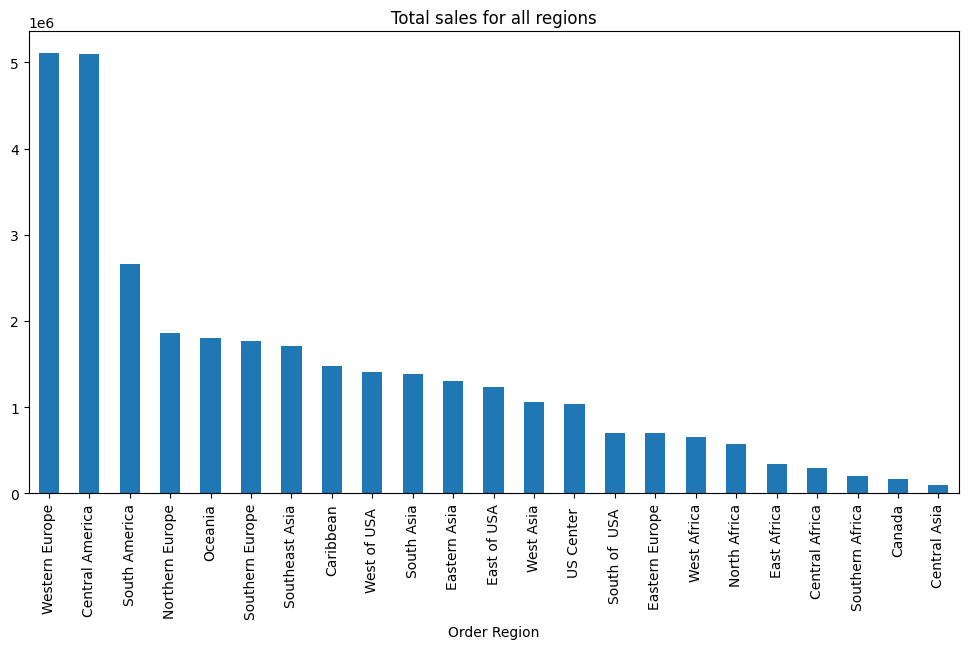

In [52]:
market = df.groupby('Market')
region = df.groupby('Order Region')
plt.figure(1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

* from the graph that European market has the most number of sales 
* Africa has the least number of sales.
* western europe regions and central america recorded highest sales.
* Canada and Central Asia has the least number of sales

### Comparision of sales by product category

<AxesSubplot:title={'center':'Average price'}, xlabel='Category Name'>

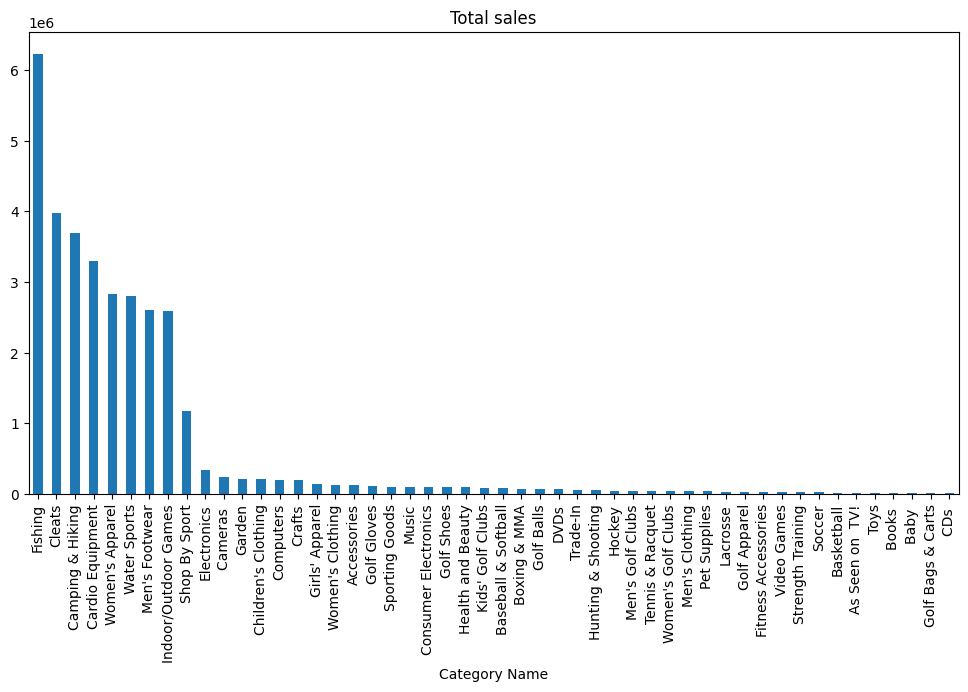

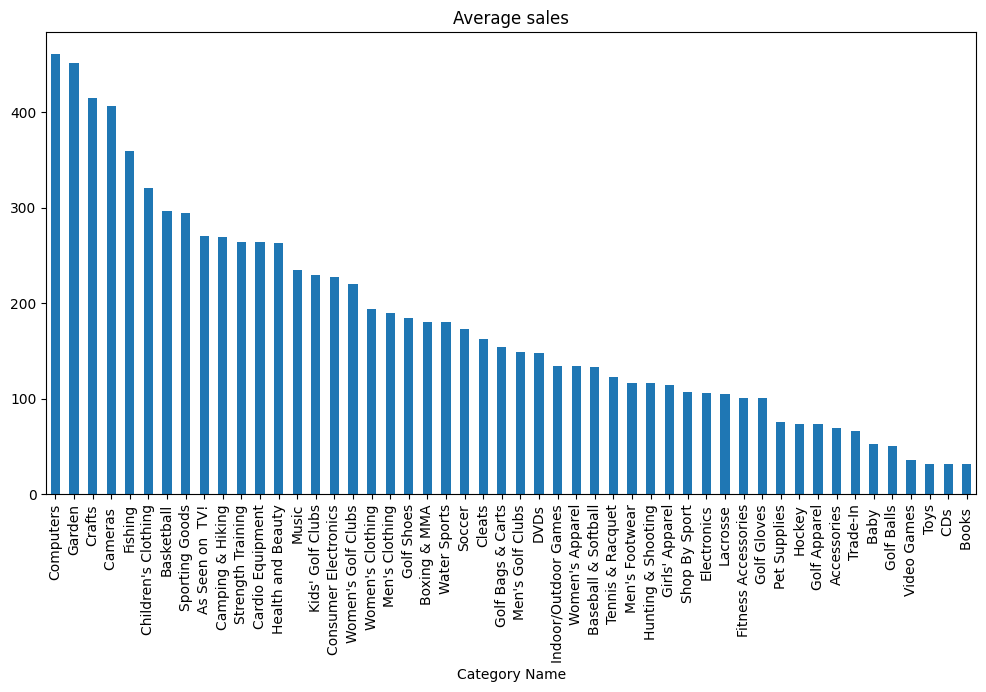

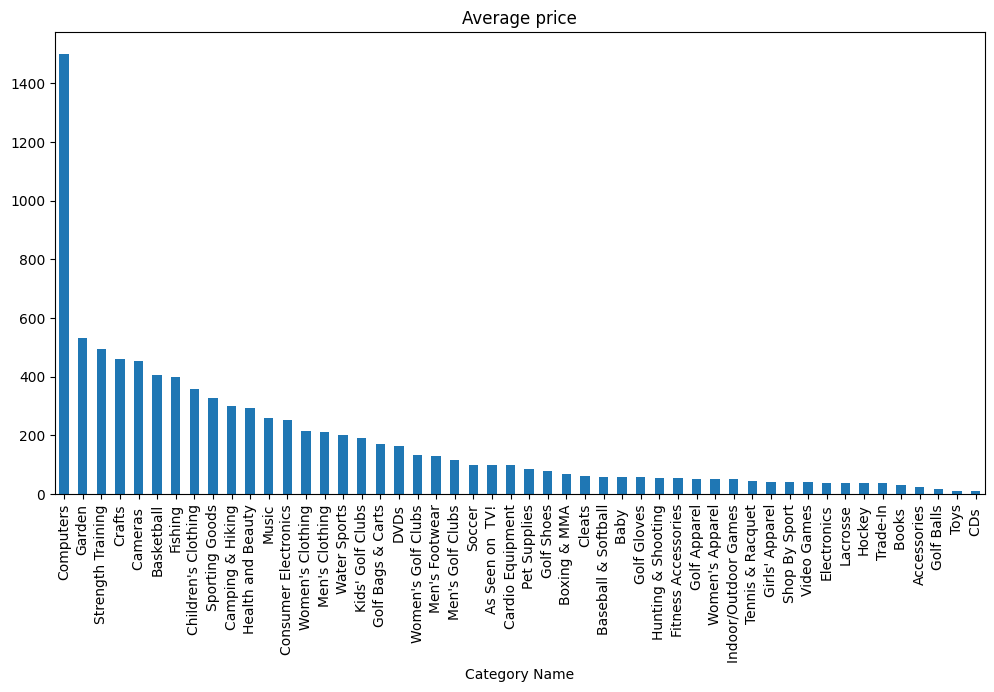

In [53]:
cat = df.groupby('Category Name')
plt.figure(1)
# Total sum of sales for all categories
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales")
# Mean sales for all categories
plt.figure(2)
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")
plt.figure(3)
# Mean prices for all categories
cat['Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")

* In Figure 1, the fishing category had the highest number of sales, followed by Cleats.
* Surprisingly, the top 7 products with the highest average prices were also the most sold products on average.
* For instance, computers had approximately 1350 sales despite their price being $1500.
* Given the high correlation between price and sales, it's intriguing to investigate how price impacts sales for all products and to identify any trends.

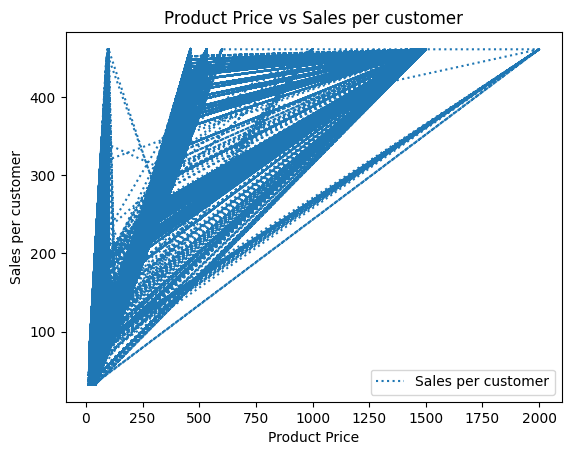

In [54]:
df.plot(x='Product Price', y='Sales per customer',linestyle='dotted',
     markerfacecolor='blue', markersize=12) 
plt.title('Product Price vs Sales per customer')
plt.xlabel('Product Price') 
plt.ylabel('Sales per customer')
plt.show()

It can be observed that prices has linear relation with sales.

In [55]:
df['order_year']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_week_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).day_name()
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour
df['order_month_year'] = pd.to_datetime(df['order date (DateOrders)']).dt.to_period('M')

In [56]:
df=df.drop(['order date (DateOrders)'],axis=1)

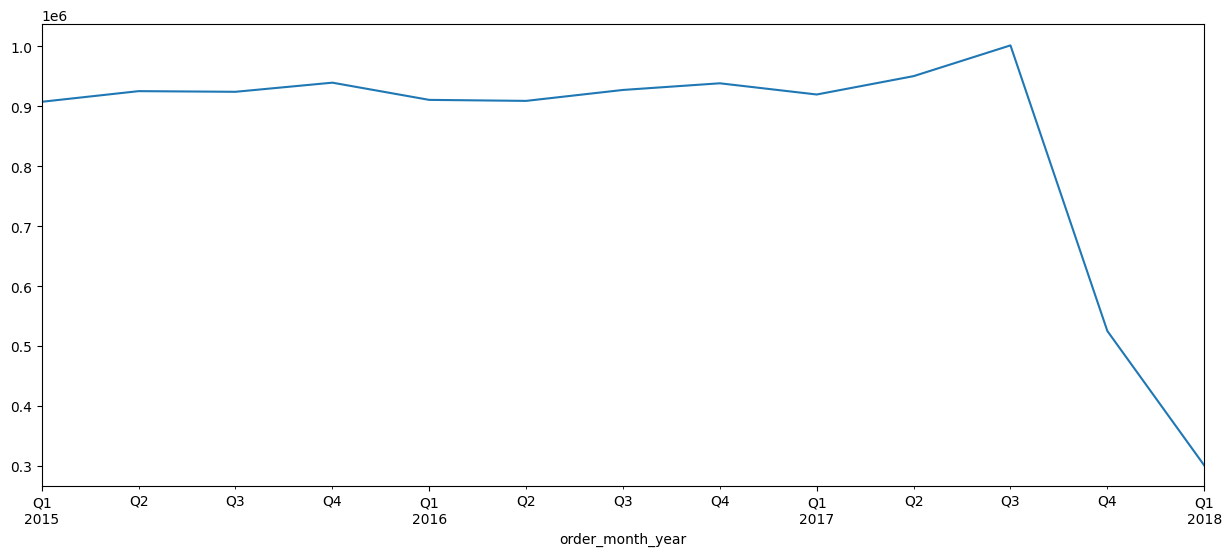

In [57]:
quater= df.groupby('order_month_year')
quartersales=quater['Sales per customer'].sum().resample('Q').mean().plot(figsize=(15,6))

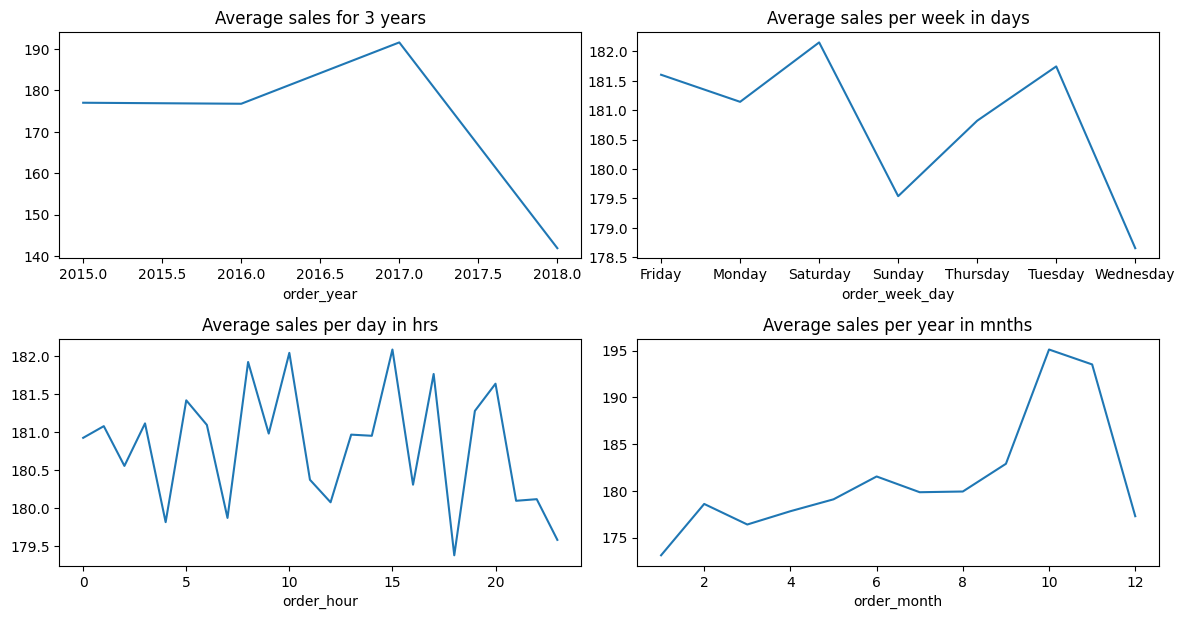

In [58]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quater= df.groupby('order_year')
quater['Sales per customer'].mean().plot(figsize=(12,12),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
days=df.groupby("order_week_day")
days['Sales per customer'].mean().plot(figsize=(12,12),title='Average sales per week in days')
plt.subplot(4, 2, 3)
hrs=df.groupby("order_hour")
hrs['Sales per customer'].mean().plot(figsize=(12,12),title='Average sales per day in hrs')
plt.subplot(4, 2, 4)
mnth=df.groupby("order_month")
mnth['Sales per customer'].mean().plot(figsize=(12,12),title='Average sales per year in mnths')
plt.tight_layout()
plt.show()

* October had the highest order frequency, closely followed by November, while the rest of the months showed consistent order patterns.
* In 2017, customers placed the most orders compared to other years.
* Saturdays saw the highest average sales, while Wednesdays recorded the lowest.
* Sales remained relatively consistent throughout the day, regardless of the time.

## Comparision on the basis of Payment type

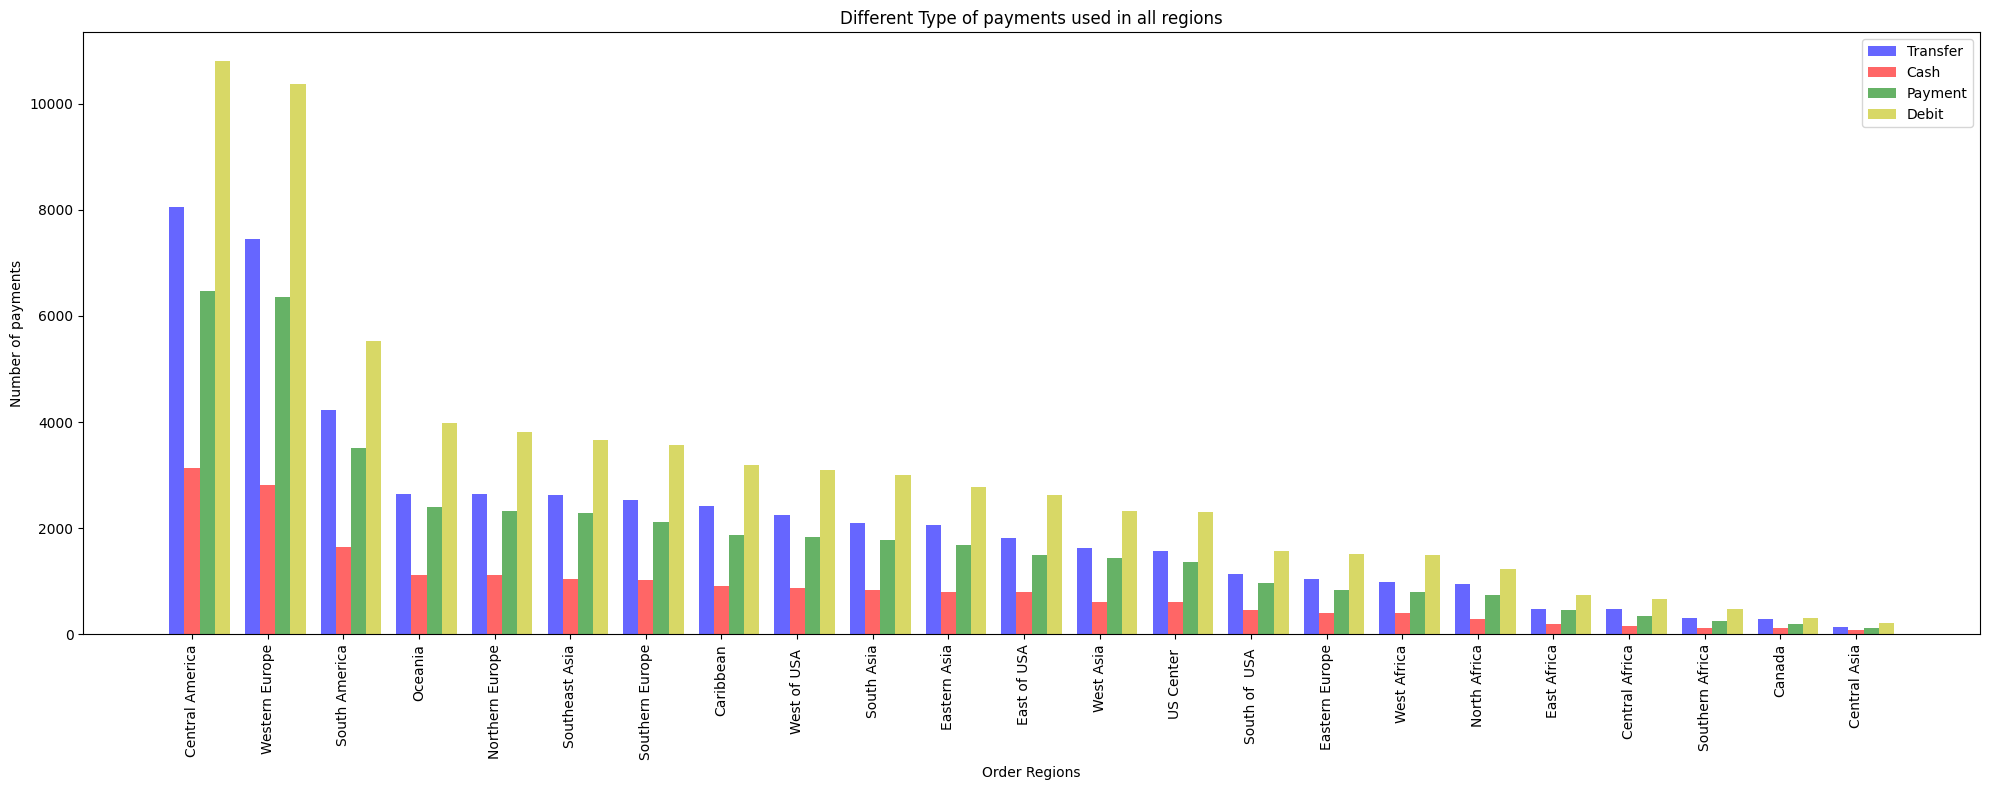

In [59]:
a= df[(df['Type'] == 'TRANSFER')]
b= df[(df['Type'] == 'CASH')]
c= df[(df['Type'] == 'PAYMENT')]
d= df[(df['Type'] == 'DEBIT')]
count1=a['Order Region'].value_counts()
count2=b['Order Region'].value_counts()
count3=c['Order Region'].value_counts()
count4=d['Order Region'].value_counts()
names=df['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Transfer')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Cash')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

Debit type is most preferred payment method by people in all regions, Cash payment being the least preferred method.

# **Analysis of loss on sales by different Product categories and Region of sales**

Total revenue lost with orders -611744.7000739169


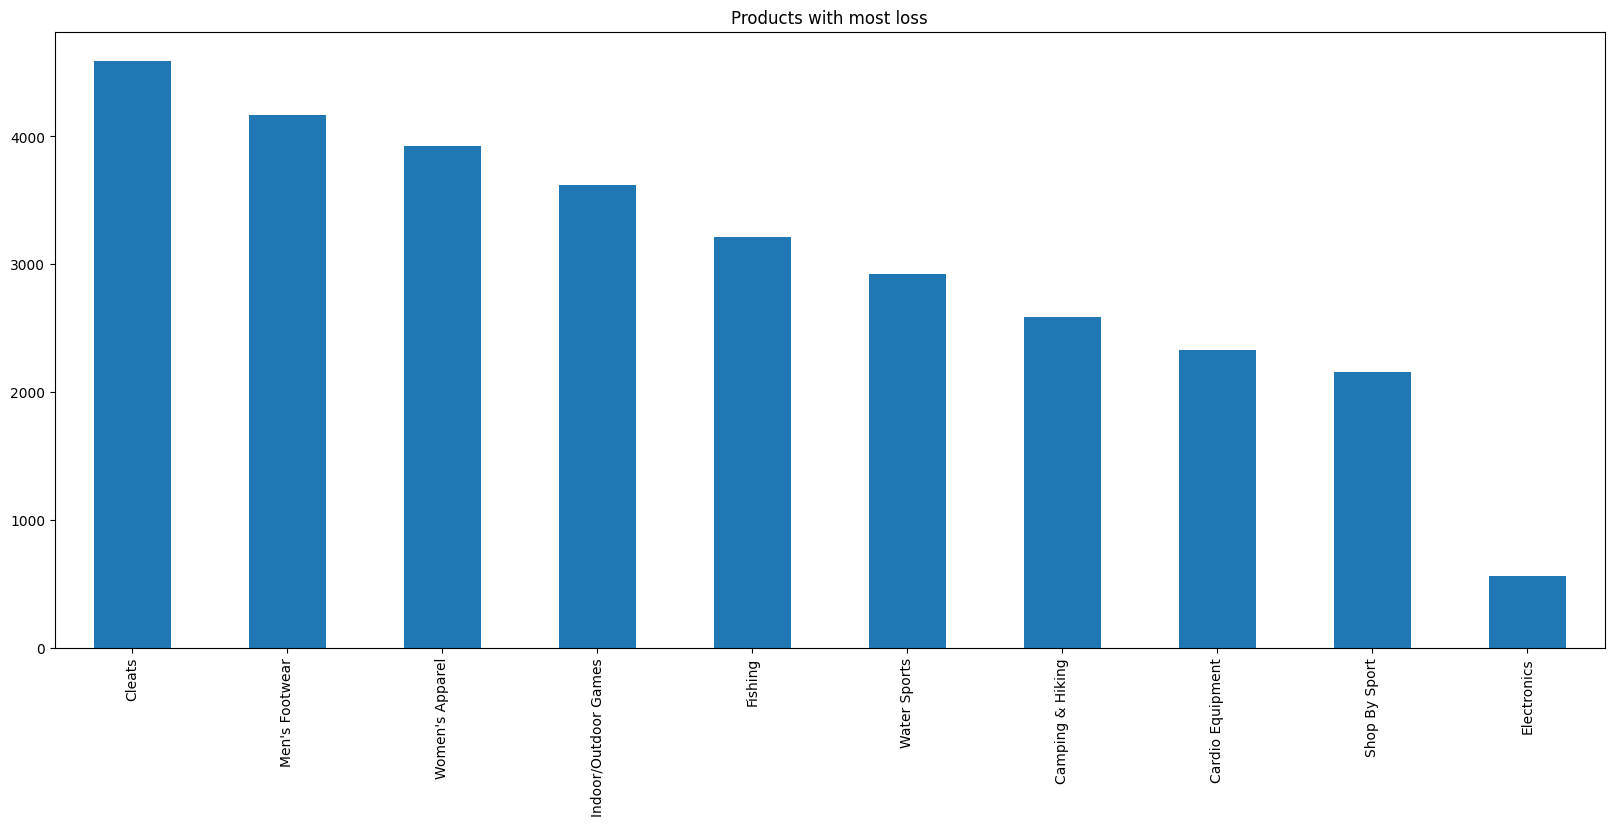

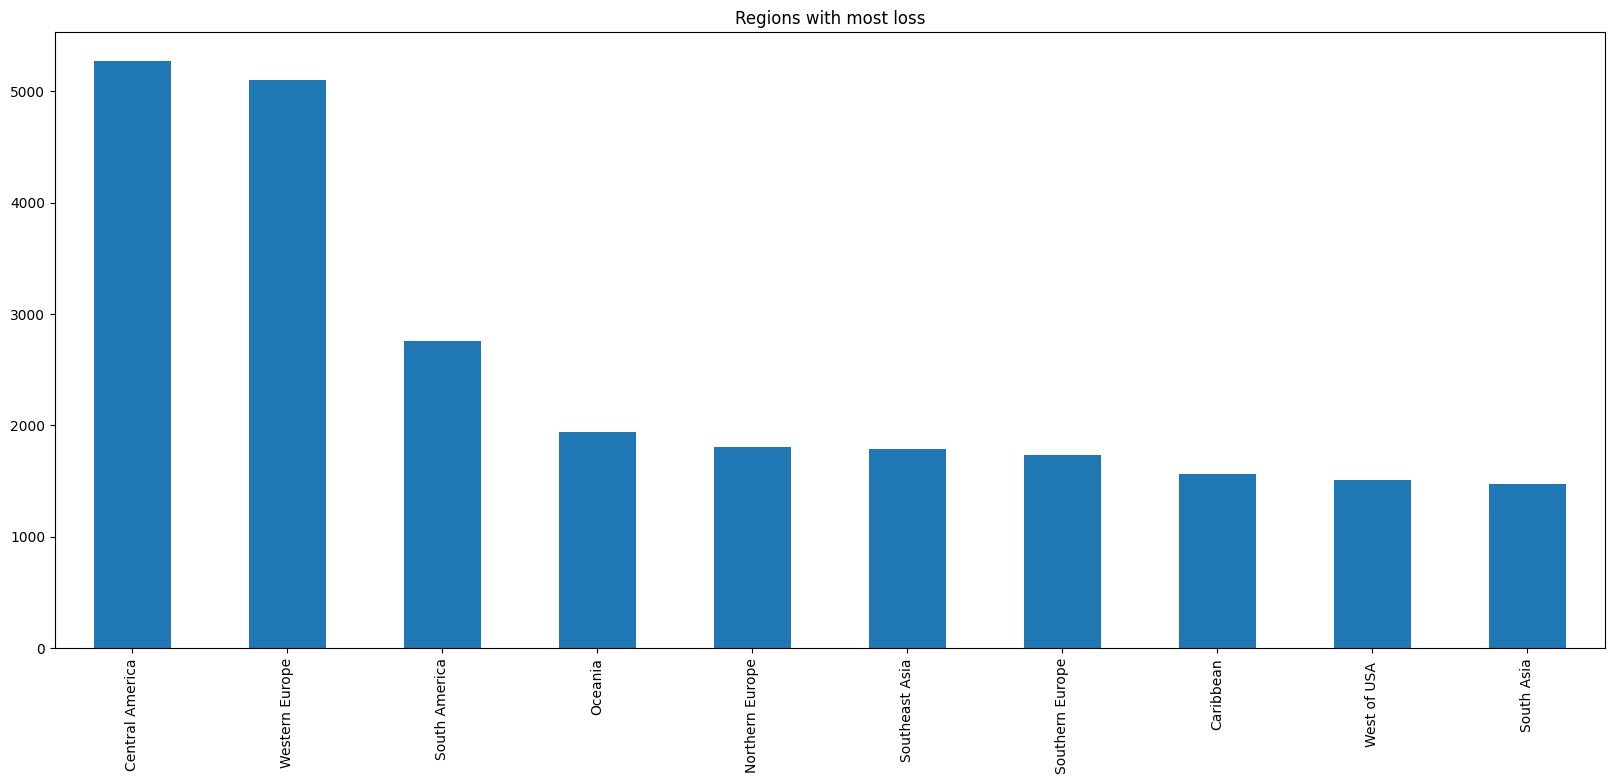

In [60]:
loss = df[(df['Benefit per order']<0)]
#Plotting top 10 products with most loss
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most loss")
plt.figure(2)
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most loss")
#Sum of total sales which are lost
print('Total revenue lost with orders',loss['Benefit per order'].sum())

* The total loss in sales amounts to approximately 3.9 million dollars, a substantial figure.
* Cleats emerge as the category with the highest loss in sales, closely followed by Mens footwear.
* The regions experiencing the most significant lost sales are Central America and Western Europe.
* These lost sales could be attributed to suspected frauds or delayed deliveries.

## **Checking for fraud regions and used payment types for suspected frauds**

In [61]:
df['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

Checking for the order status as suspected fraud for each category

In [62]:
fraud_DEBIT = df[(df['Type'] == 'DEBIT')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
fraud_DEBIT['Order Region'].value_counts()

Series([], Name: Order Region, dtype: int64)

In [63]:
fraud_CASH = df[(df['Type'] == 'CASH')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
fraud_CASH['Order Region'].value_counts()


Series([], Name: Order Region, dtype: int64)

In [64]:
fraud_PAYMENT = df[(df['Type'] == 'PAYMENT')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
fraud_PAYMENT['Order Region'].value_counts()

Series([], Name: Order Region, dtype: int64)

In [65]:
fraud_TRANSFER = df[(df['Type'] == 'TRANSFER')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
fraud_TRANSFER['Order Region'].value_counts()

Western Europe     705
Central America    631
South America      361
West of USA        236
Oceania            229
Southern Europe    223
Caribbean          190
Southeast Asia     187
Northern Europe    170
Eastern Asia       156
East of USA        150
West Asia          147
South Asia         144
US Center          121
North Africa        75
Eastern Europe      74
West Africa         71
South of  USA       66
Southern Africa     32
East Africa         31
Canada              29
Central Africa      28
Central Asia         6
Name: Order Region, dtype: int64

Observation:-
* Here have observed that payment type PAYMENT, DEBIT, CASH have no suspected fraud values in the order status column
* Most of the frauds have occured in the transfer(Mode of payment).

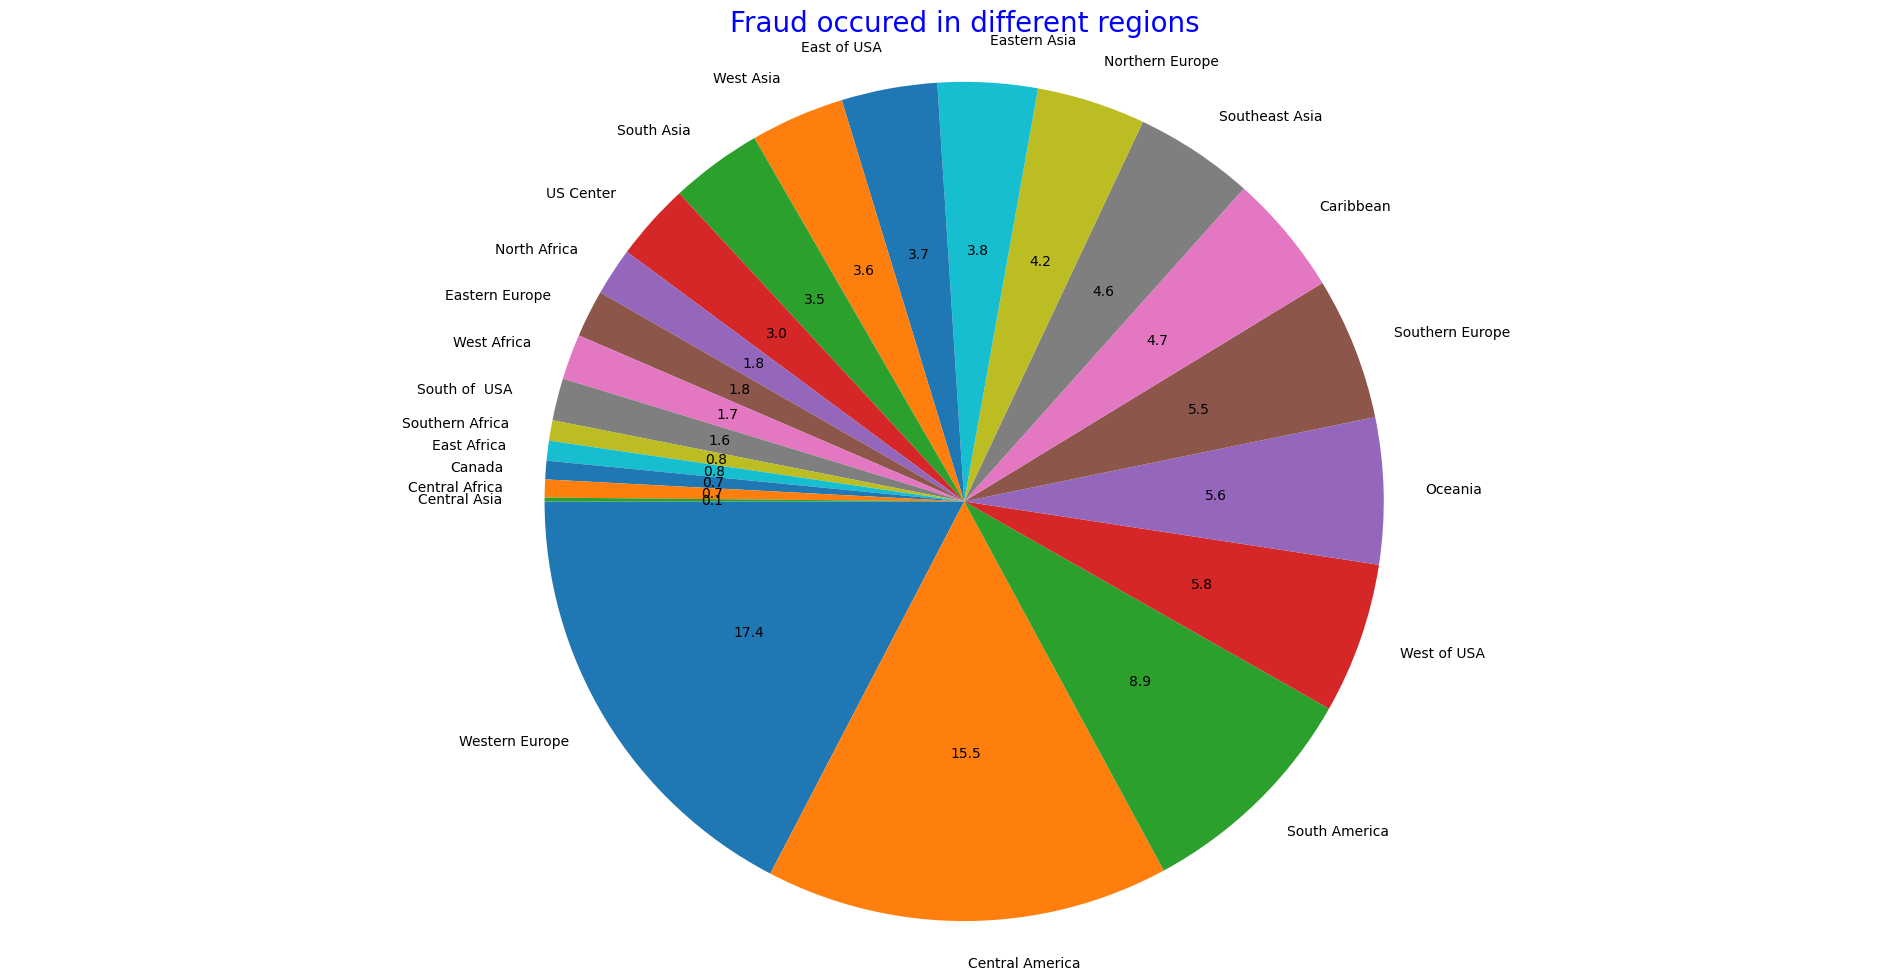

In [66]:
fraud = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')]#separating orders with suspected fraud
#Plotting pie chart with respect to order region
fraud=fraud['Order Region'].value_counts().plot.pie(figsize=(24,12),startangle=180,autopct='%.1f',)
plt.title("Fraud occured in different regions",size=20,color='b')
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

* From this pie chart we can see that the highest number of frauds have occured in Western Europe which is approximately 17.4%.
* Then Central American region have the fraud approximately 15.5%
* Least frauds occured in central asia.

In [67]:
amount = df[(df['Order Region'] == 'Western Europe')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
amount['Sales per customer'].sum()

132182.34130894003

In [68]:
amount = df[(df['Order Region'] == 'Central America')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
amount['Sales per customer'].sum()

113357.85101384

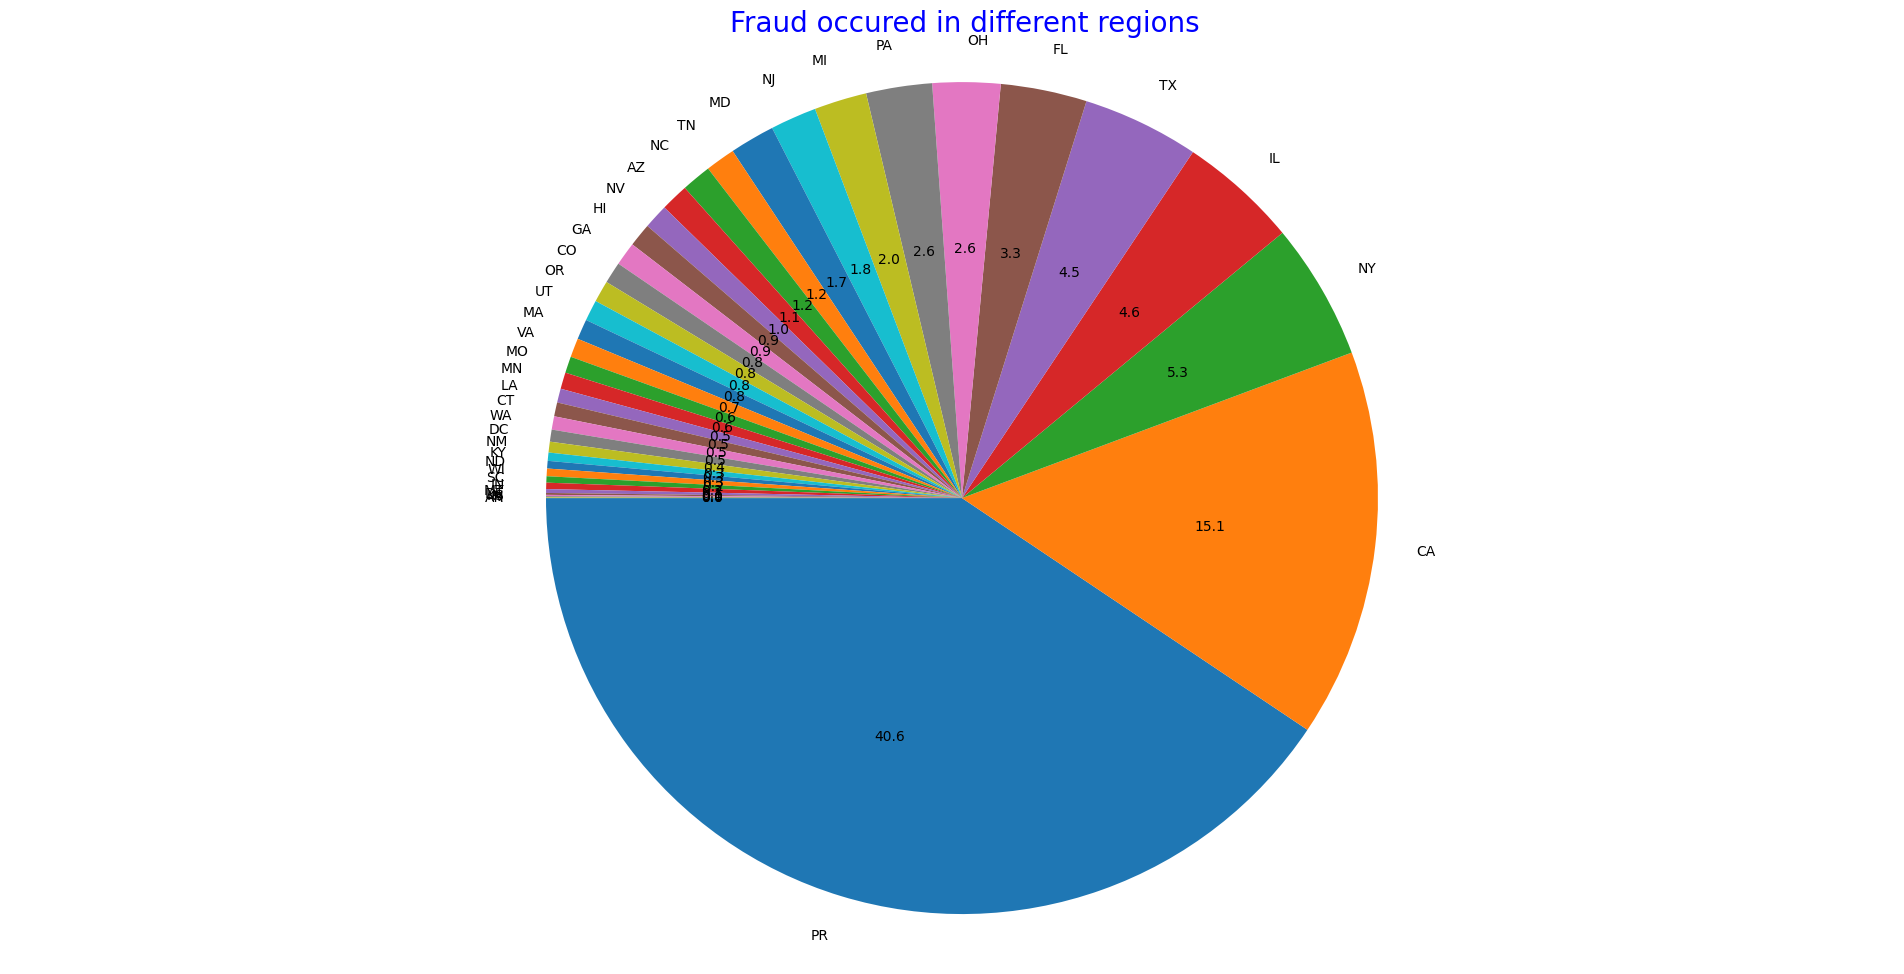

In [69]:
fraud = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')]#separating orders with suspected fraud
#Plotting pie chart with respect to order region
fraud=fraud['Customer State'].value_counts().plot.pie(figsize=(24,12),startangle=180,autopct='%.1f',)
plt.title("Fraud occured in different regions",size=20,color='b')
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

In [70]:
amount = df[(df['Customer State'] == 'PR')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
amount['Sales per customer'].sum()

300416.77283194

In [71]:
amount = df[(df['Customer State'] == 'CA')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
amount['Sales per customer'].sum()

107595.64112178

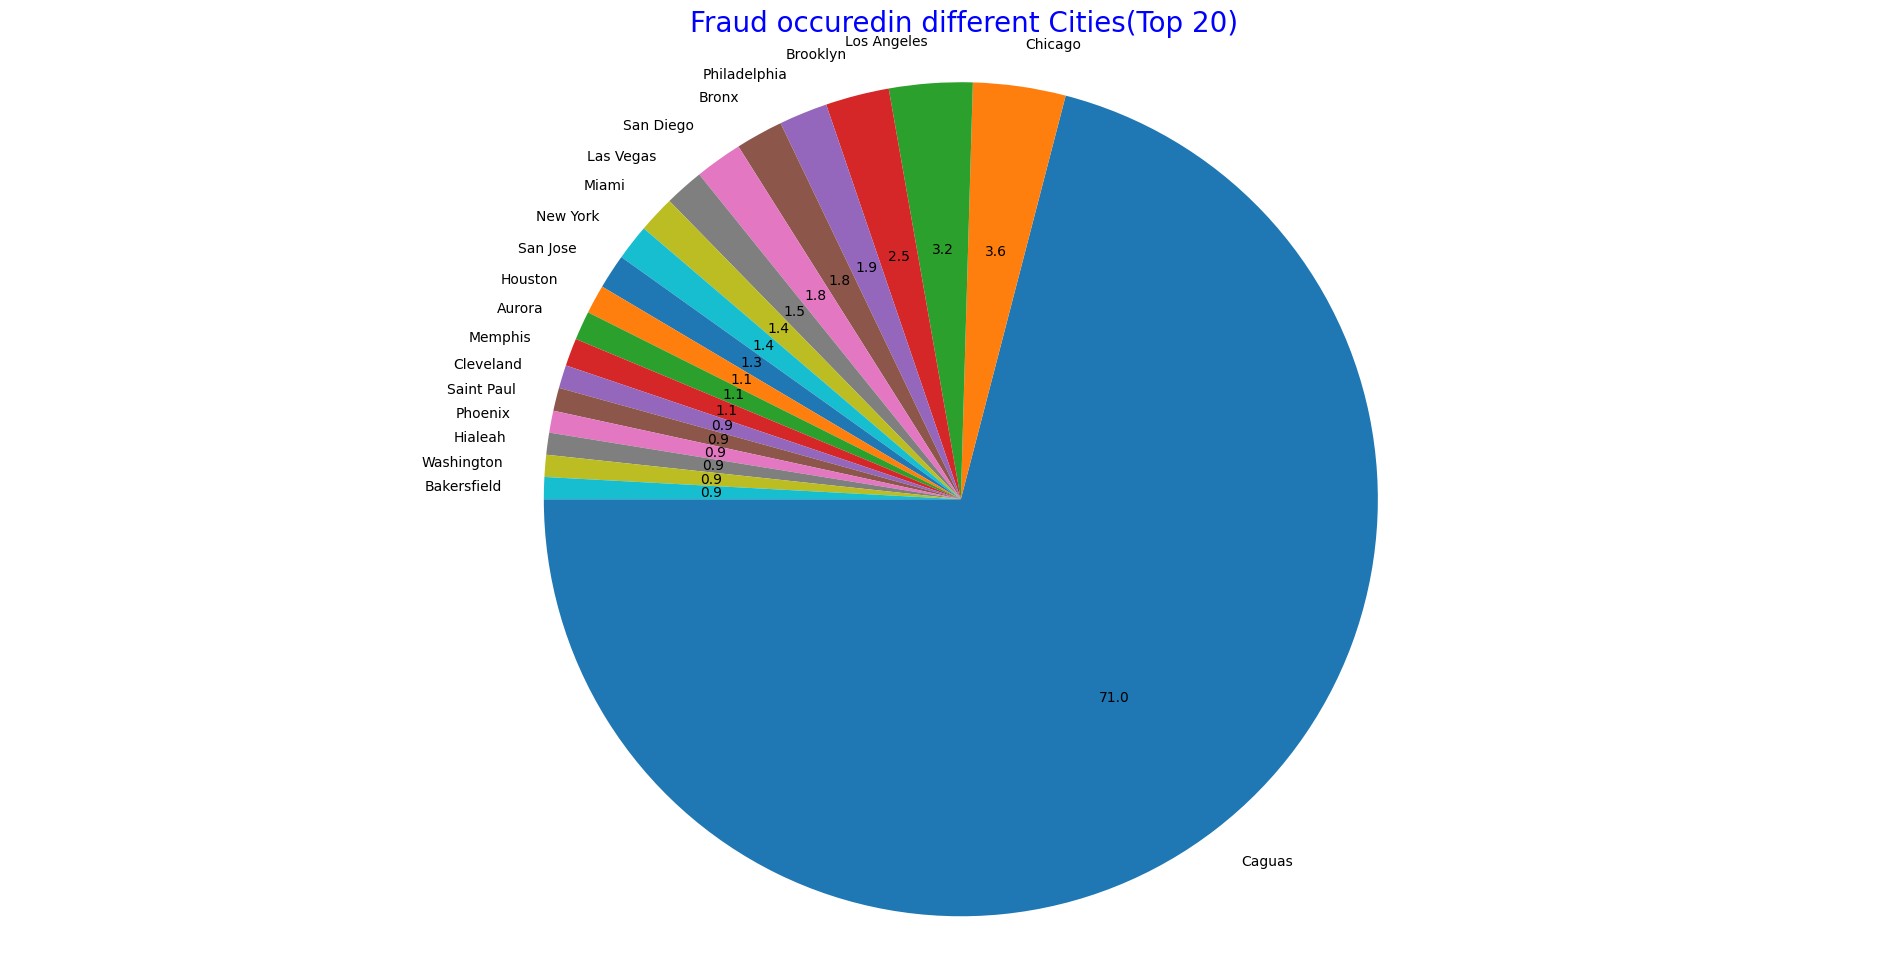

In [72]:
fraud = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')]#separating orders with suspected fraud
#Plotting pie chart with respect to order region
fraud=fraud['Customer City'].value_counts().nlargest(20).plot.pie(figsize=(24,12),startangle=180,autopct='%.1f',)
plt.title("Fraud occuredin different Cities(Top 20)",size=20,color='b')
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

In [73]:
amount = df[(df['Customer City'] == 'Caguas')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
amount['Sales per customer'].sum()

287400.42266574

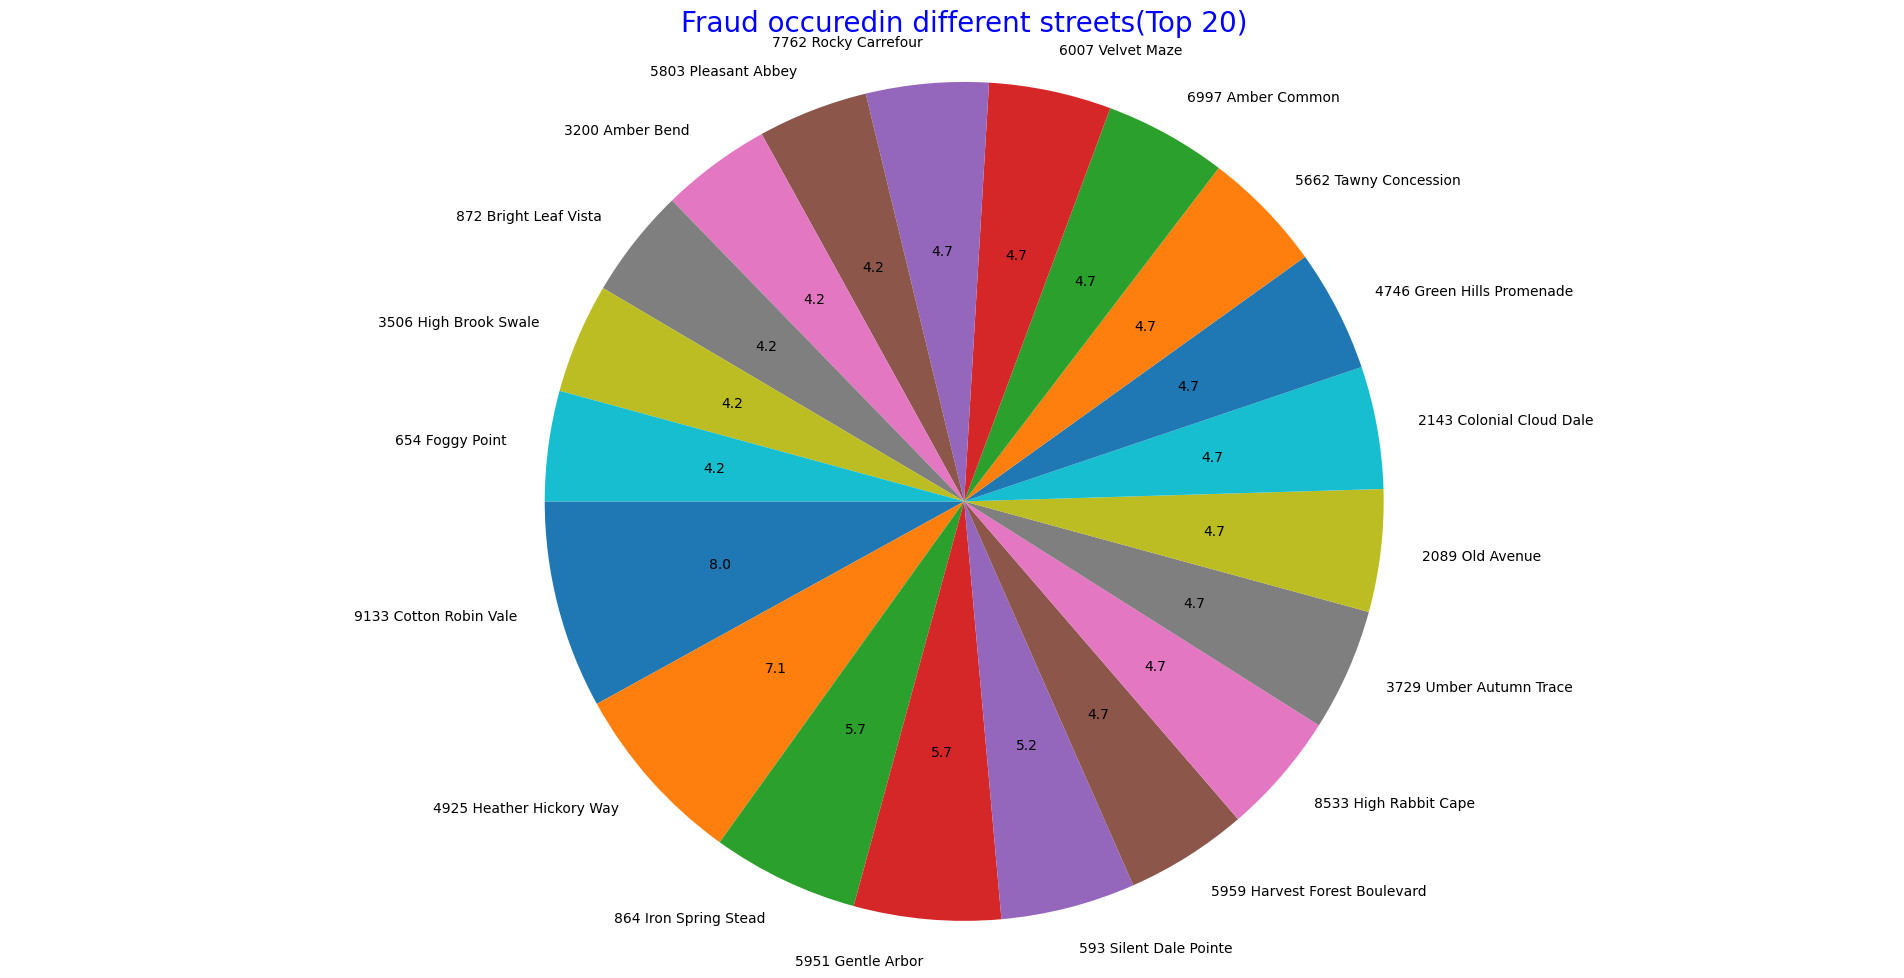

In [74]:
fraud = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')]#separating orders with suspected fraud
#Plotting pie chart with respect to order region
fraud=fraud['Customer Street'].value_counts().nlargest(20).plot.pie(figsize=(24,12),startangle=180,autopct='%.1f',)
plt.title("Fraud occuredin different streets(Top 20)",size=20,color='b')
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

In [75]:
amount = df[(df['Customer Street'] == '9133 Cotton Robin Vale')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
amount['Sales per customer'].sum()

2990.9400596400005

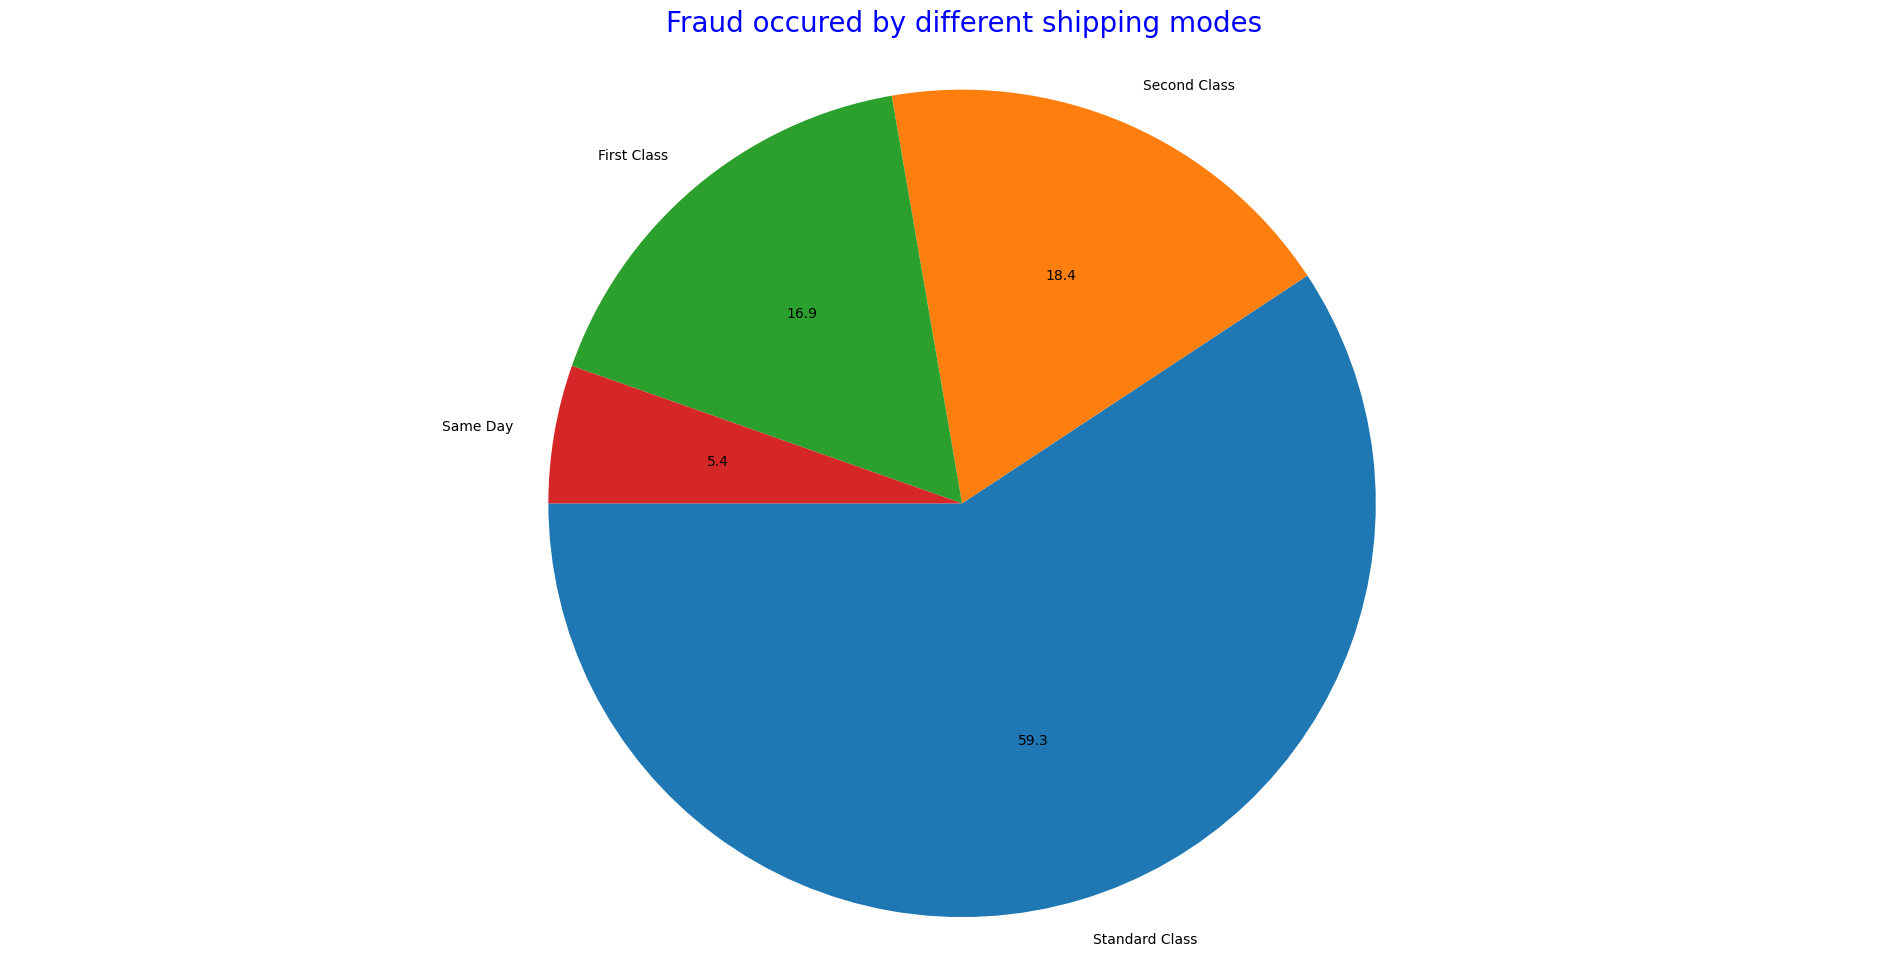

In [76]:
fraud = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')]#separating orders with suspected fraud
#Plotting pie chart with respect to order region
fraud=fraud['Shipping Mode'].value_counts().plot.pie(figsize=(24,12),startangle=180,autopct='%.1f',)
plt.title("Fraud occured by different shipping modes",size=20,color='b')
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

In [77]:
amount = df[(df['Shipping Mode'] == 'Standard Class')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
#Plotting bar chart for top 10 most suspected fraud customers
amount['Sales per customer'].sum()

429953.13429462997

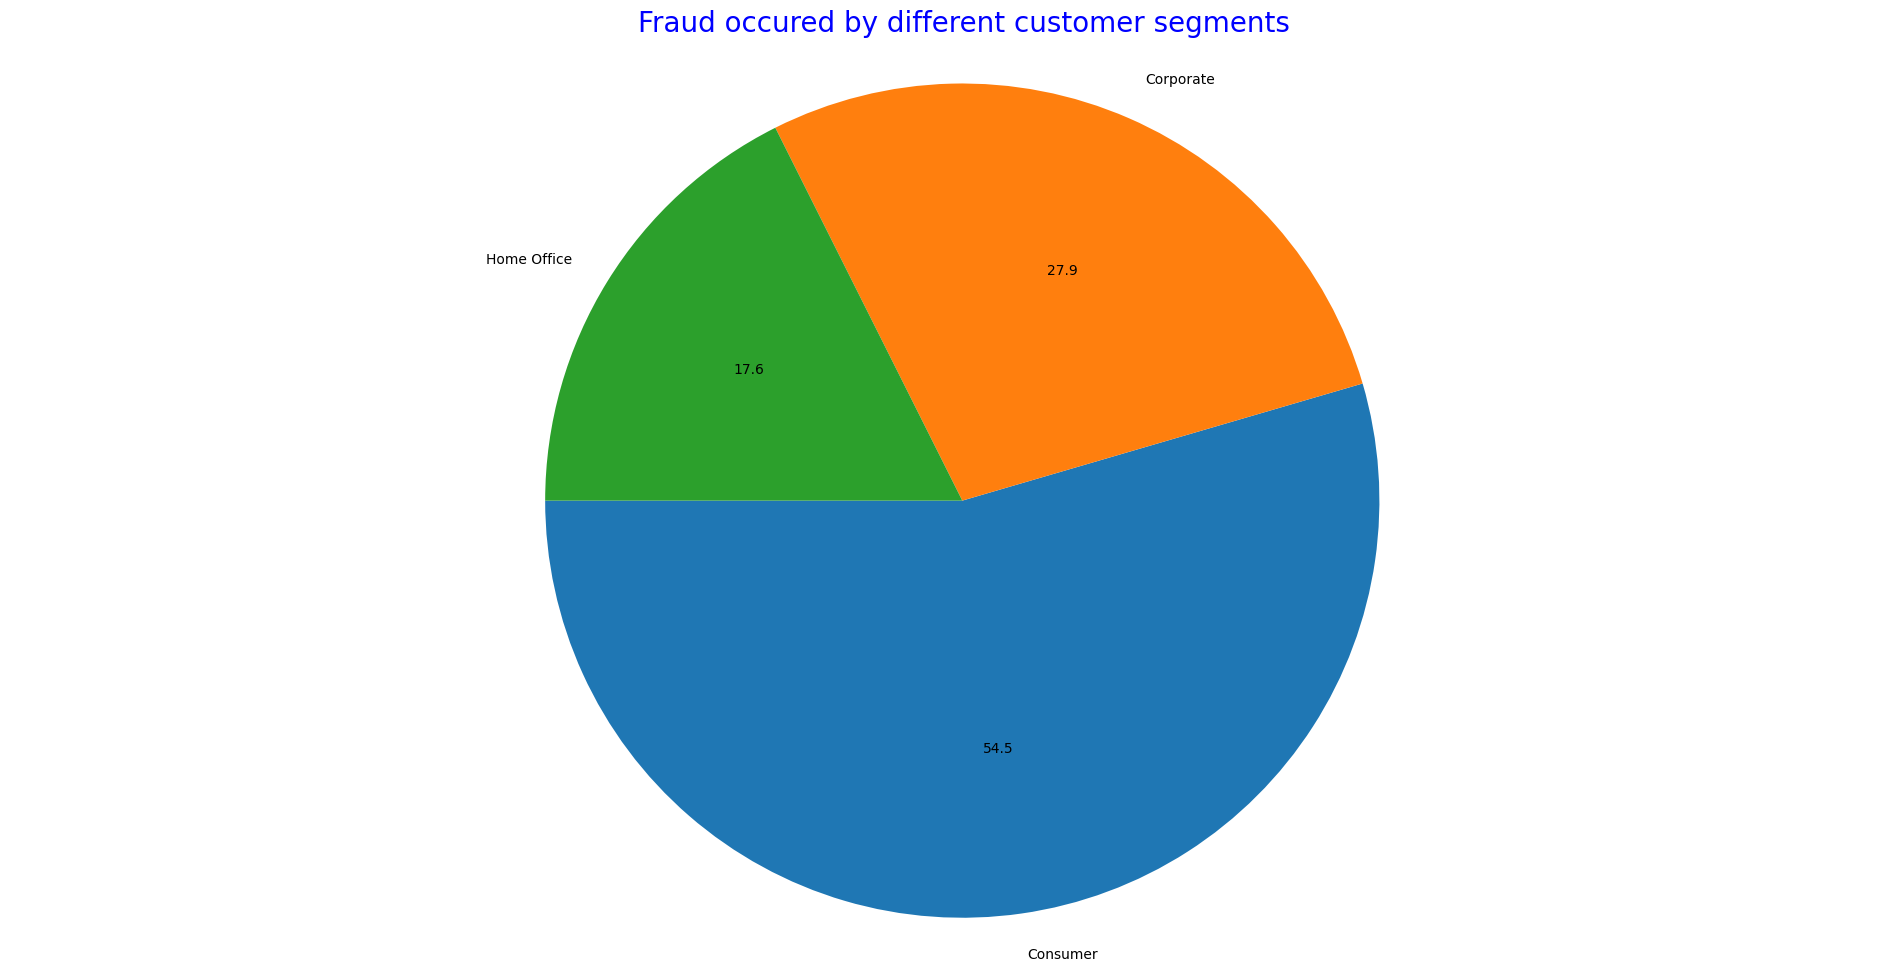

In [78]:
fraud = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')]#separating orders with suspected fraud
#Plotting pie chart with respect to order region
fraud=fraud['Customer Segment'].value_counts().plot.pie(figsize=(24,12),startangle=180,autopct='%.1f',)
plt.title("Fraud occured by different customer segments",size=20,color='b')
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

Fraud analysis by product category

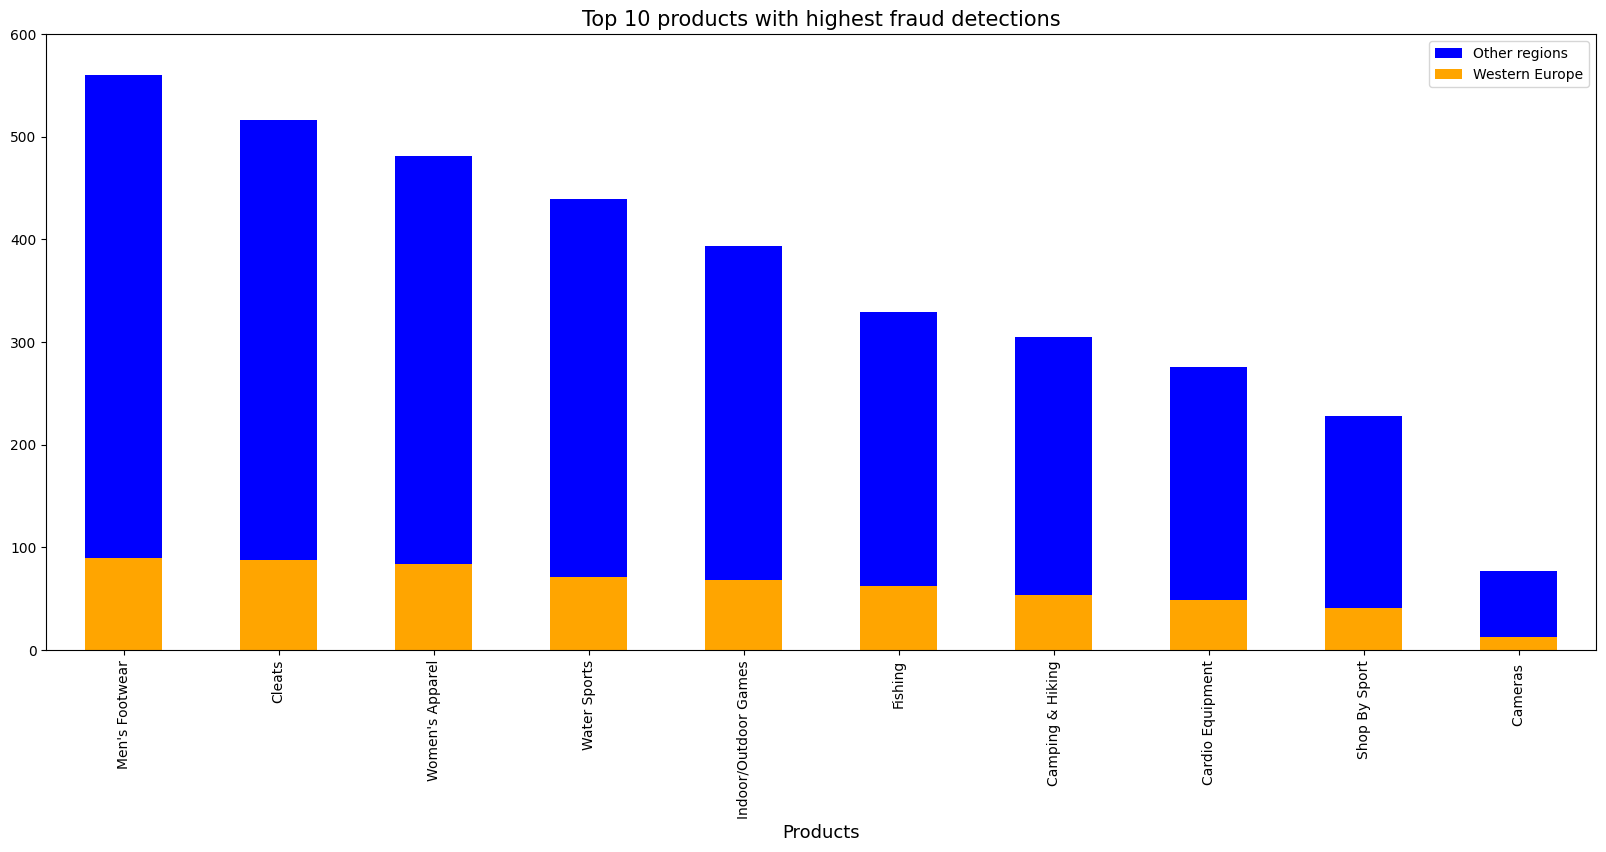

In [79]:
fraud = df[(df['Order Status'] == 'SUSPECTED_FRAUD')] # 
high_fraud = df[(df['Order Status'] == 'SUSPECTED_FRAUD') &(df['Order Region'] == 'Western Europe')]
#Plotting bar chart for top 10 most suspected fraud department in all regions
fraud1=fraud['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='blue')
#Plotting bar chart for top 10 most suspected fraud department in Western Europe
fraud2=high_fraud['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='orange')
plt.legend(["Other regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0,600)
plt.show()

* Highest fraud is done in the Men's Footwear category followed by cleats
* Least frauds are occured in cameras product category

In [80]:
amount = df[(df['Category Name'] == "Men's Footwear")&(df['Order Status'] == 'SUSPECTED_FRAUD')]
amount['Sales per customer'].sum()

60165.33955298

In [81]:
a=df[(df['Late_delivery_risk']==0)&(df['Order Status']=='SUSPECTED_FRAUD')]
a

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
10,TRANSFER,6,2,130.580002,272.029999,Shipping canceled,0,Sporting Goods,Caguas,Puerto Rico,...,Smart watch,327.750000,1/19/2018 9:18,Second Class,germaneshort,2018,1,Saturday,9,2018-01
24,TRANSFER,2,2,90.279999,288.420013,Shipping canceled,0,Sporting Goods,Billings,EE. UU.,...,Smart watch,327.750000,1/15/2018 4:24,Second Class,simonevance,2018,1,Saturday,4,2018-01
183,TRANSFER,5,4,28.850000,128.220001,Shipping canceled,0,Electronics,Freeport,EE. UU.,...,Under Armour Men's Compression EV SL Slide,44.990002,5/13/2016 17:42,Standard Class,patriciapetersen,2016,5,Sunday,17,2016-05
184,TRANSFER,5,4,133.910004,278.970001,Shipping canceled,0,Cardio Equipment,Fort Washington,EE. UU.,...,Nike Men's Free 5.0+ Running Shoe,99.989998,04-07-2016 19:51,Standard Class,juliepetersen,2016,4,Saturday,19,2016-04
185,TRANSFER,6,4,79.160004,272.970001,Shipping canceled,0,Cardio Equipment,Bakersfield,EE. UU.,...,Nike Men's Free 5.0+ Running Shoe,99.989998,8/20/2016 2:51,Standard Class,lisasmith,2016,8,Sunday,2,2016-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180274,TRANSFER,5,2,151.000000,339.980011,Shipping canceled,0,Fishing,Caguas,Puerto Rico,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,02-03-2016 03:49,Second Class,williamsmith,2016,1,Friday,3,2016-01
180309,TRANSFER,2,1,114.830002,347.980011,Shipping canceled,0,Fishing,Modesto,EE. UU.,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/28/2016 21:52,First Class,jamessmith,2016,1,Tuesday,21,2016-01
180352,TRANSFER,4,4,90.000000,399.980011,Shipping canceled,0,Fishing,Albuquerque,EE. UU.,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/29/2016 3:08,Standard Class,marysmith,2016,1,Monday,3,2016-01
180406,TRANSFER,6,4,-21.000000,399.980011,Shipping canceled,0,Fishing,Caguas,Puerto Rico,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/28/2016 12:46,Standard Class,anthonymcguire,2016,1,Friday,12,2016-01


Fraud Analysis based on the customers

<AxesSubplot:title={'center':'Top 10 Highest Fraud Customers'}>

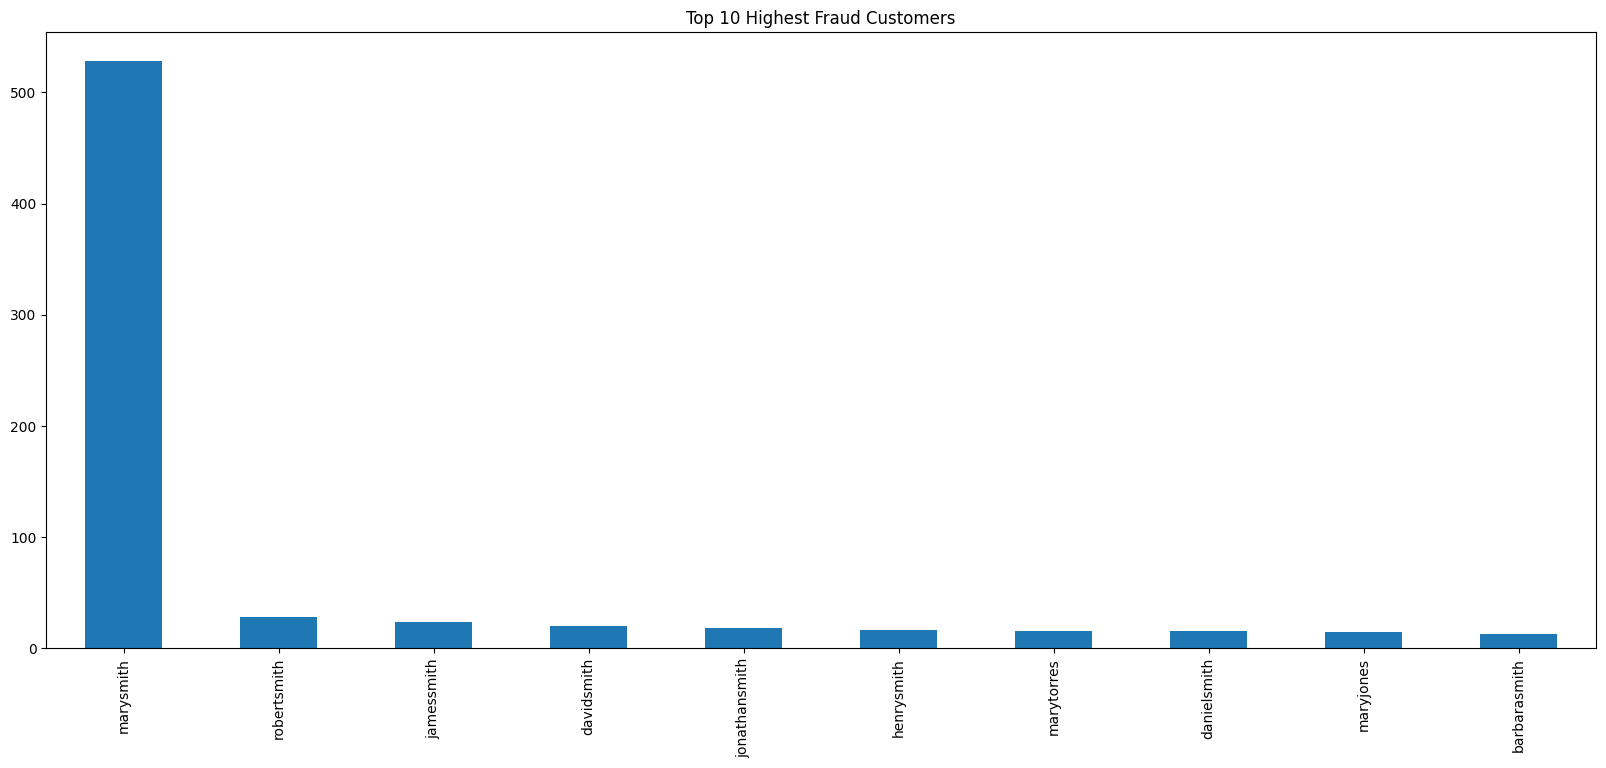

In [82]:
#Filtering out suspected fruad orders
cus = df[(df['Order Status'] == 'SUSPECTED_FRAUD')] 
#Top 10 customers with most fraud
cus['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Highest Fraud Customers")

In [83]:
df['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

## **Now spliting the data in training and testing for model training**

In [84]:
train_data=df.copy()

Now adding New columns named Fraud and late delivery which includes the binary values 0 and 1 for the values SUSPECTED FRAUD and Late Delivery in Order status column

In [85]:
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['late_delivery']=np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)

Dropping the values Order Status, Delivery Status, Late Delivery Risk, order month year, order date

In [86]:
train_data.drop(['Delivery Status','Late_delivery_risk','Order Status','order_month_year','shipping date (DateOrders)'], axis=1, inplace=True)

In [90]:
train_data['fraud'].value_counts()

0    176457
1      4062
Name: fraud, dtype: int64

In [94]:
col_dic= {}
for k,v in enumerate(train_data.columns):
  col_dic[v]= k+1

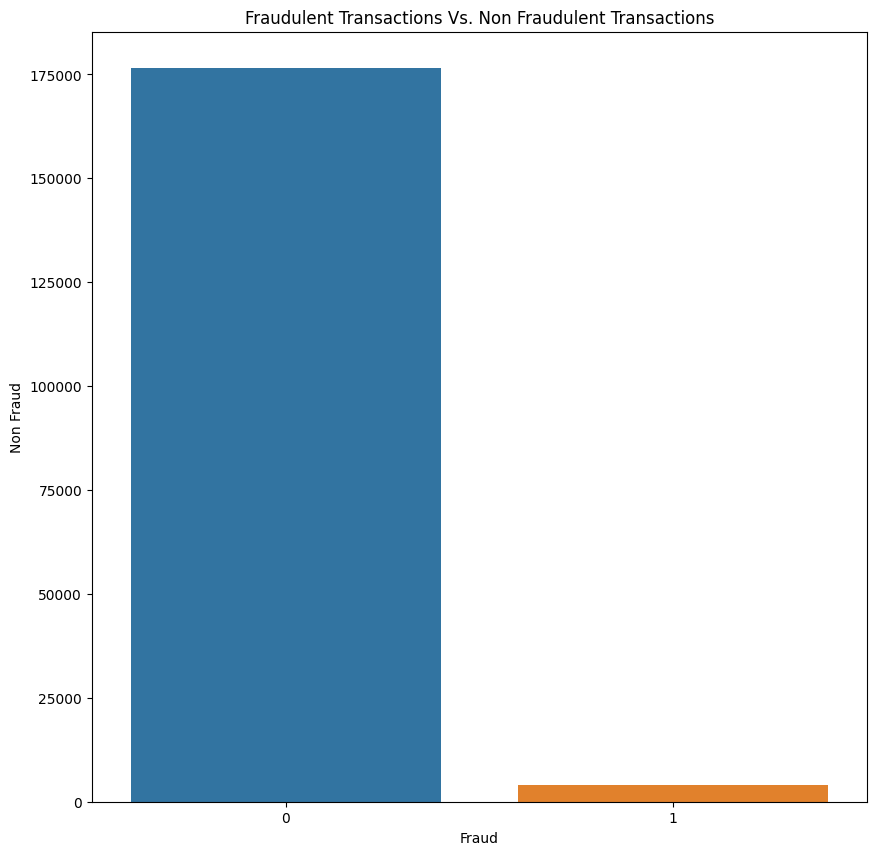

In [92]:
#Imbalanced Dataset: 0 non.fraudulent and 1 fraudulent
plt.figure(figsize=(10,10))
sns.countplot(x= "fraud", data= train_data)
plt.title ("Fraudulent Transactions Vs. Non Fraudulent Transactions")
plt.xlabel ("Fraud")
plt.ylabel ("Non Fraud")
plt.show()

#Check and process Outliers
-Outliers influence the best fit line. Check the amount of outliers and depending on percentage either transform them, drop them or leave them.


In [311]:
train_data.drop(['_id'],axis=1,inplace=True)

In [106]:
train_data.dtypes

Type                               int32
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Name                      int32
Customer City                      int32
Customer Country                   int32
Customer Segment                   int32
Customer State                     int32
Customer Street                    int32
Customer Zipcode                 float64
Department Name                    int32
Market                             int32
Order City                         int32
Order Country                      int32
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Quantity                int64
Order Region                       int32
Order State                        int32
Order Zipcode                    float64
Product Description              float64
Product Name                       int32
Product Price   

In [98]:
train_data['Customer State']=train_data['Customer State'].astype(str)

In [99]:
train_data['Customer State'].unique()

array(['PR', 'CA', 'NY', 'FL', 'MA', 'IL', 'MT', 'PA', 'MI', 'TX', 'DE',
       'GA', 'MD', 'OH', 'HI', 'NJ', 'WI', 'AZ', 'CO', 'MN', 'NC', 'NM',
       'OR', 'SC', 'VA', 'UT', 'WA', 'KY', 'WV', 'RI', 'CT', 'LA', 'TN',
       'DC', 'ND', 'MO', 'IN', 'ID', 'NV', 'KS', 'AR', 'OK', 'AL', 'IA',
       '95758', '91732'], dtype=object)

Here we can see that we have many columns which have the values OBject type which can not be trained in Machine learning model so we have to encode them using label encoder for model training

In [100]:
le = preprocessing.LabelEncoder()
#converting the categorical columns into numeric values by encoding them using label encoder
train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
train_data['Order City']        = le.fit_transform(train_data['Order City'])
train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
train_data['Order State']       = le.fit_transform(train_data['Order State'])
train_data['Shipping Mode']     = le.fit_transform(train_data['Shipping Mode'])
train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['Order Country']     = le.fit_transform(train_data['Order Country'])
train_data['Customer Full Name']= le.fit_transform(train_data['Customer Full Name'])
train_data['Customer Street']   = le.fit_transform(train_data['Customer Street'])

In [101]:
train_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Name,Customer City,Customer Country,Customer Segment,Customer State,...,Product Name,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,fraud,late_delivery
0,1,3,4,91.250000,314.640015,40,66,1,0,36,...,78,327.75,3,1876,2018,1,6,22,0,0
1,3,5,4,-21.000000,311.359985,40,66,1,0,36,...,78,327.75,3,5378,2018,1,2,12,0,1
2,0,4,4,-21.000000,309.720001,40,452,0,0,5,...,78,327.75,3,4429,2018,1,2,12,0,0
3,1,3,4,22.860001,304.809998,40,285,0,2,5,...,78,327.75,3,12923,2018,1,2,11,0,0
4,2,2,4,134.210007,298.250000,40,66,1,1,36,...,78,327.75,3,10638,2018,1,2,11,0,0


In [8]:
!pip install imblearn

In [109]:
X= train_data.drop(["fraud"], axis=1)
y= train_data.fraud

## OverSampling
 I use two techniques
  - Adasyn and RandomOverSampler

RandomOverSampler is over-sampling by duplicating some of the original samples of the minority class, SMOTE and ADASYN generate new samples in by interpolation.

In [317]:
train_data.dtypes

Type                               int32
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Name                      int32
Customer City                      int32
Customer Country                   int32
Customer Segment                   int32
Customer State                     int32
Customer Street                    int32
Customer Zipcode                 float64
Department Name                    int32
Market                             int32
Order City                         int32
Order Country                      int32
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Quantity                int64
Order Region                       int32
Order State                        int32
Product Name                       int32
Product Price                    float64
Shipping Mode                      int32
Order Zipcode   

Here we can observe that all the columns are converted into int values

Now spliting the data into input and output variables and dividing in Training and testing with 80:20

In [318]:
xf=train_data.loc[:, train_data.columns != 'fraud']
yf=train_data['fraud']
xf_train, xf_test,yf_train,yf_test = train_test_split(xf,yf,test_size = 0.2,random_state = 42)

In [319]:
xf.shape

(180519, 31)

In [320]:
yf.shape

(180519,)

In [321]:
sc = StandardScaler()
xf_train=sc.fit_transform(xf_train)
xf_test=sc.transform(xf_test)

Now we are using this data for training different models

In [322]:
def classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test):
    model_f=model_f.fit(xf_train,yf_train) # Fitting train data for fraud detection
    yf_pred=model_f.predict(xf_test)  
    accuracy_f=accuracy_score(yf_pred, yf_test) #Accuracy for fraud detection
    recall_f=recall_score(yf_pred, yf_test) #Recall score for  fraud detection
    conf_f=confusion_matrix(yf_test, yf_pred)# fraud detection
    f1_f=f1_score(yf_test, yf_pred)#fraud detection
    print('Model paramters used are :',model_f)
    print('Accuracy of fraud status is        :', (accuracy_f)*100,'%')
    print('Recall score of fraud status is        :', (recall_f)*100,'%')
    print('Conf Matrix of fraud status is        :\n',  (conf_f))
    print('F1 score of fraud status is        :', (f1_f)*100,'%')

## Logistic Regression

In [323]:
model_f = LogisticRegression(solver='lbfgs',random_state=0) #the classification model
#Giving inputs to the defined function
classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test)

Model paramters used are : LogisticRegression(random_state=0)
Accuracy of fraud status is        : 97.76479060491913 %
Recall score of fraud status is        : 56.91318327974276 %
Conf Matrix of fraud status is        :
 [[35120   134]
 [  673   177]]
F1 score of fraud status is        : 30.490956072351423 %


Inferences from logistic regression model:-
Accuracy = 97.76%
Recall = 57.00%
F1 Score = 30.75%

In [324]:
# Assuming you have trained a logistic regression model and have a NumPy array xf_train
import numpy as np

# List of feature names in the same order as they were used in training
feature_names = ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 
       'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode','Department Name', 'Market',
       'Order City', 'Order Country', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Quantity',
       'Order Region', 'Order State', 'Product Name', 'Product Price',
       'Shipping Mode', 'Order Zipcode', 'Customer Full Name', 'order_year',
       'order_month', 'order_week_day', 'order_hour',
       'late_delivery']

coefficients = model_f.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Now you can access the feature names and coefficients
print(feature_importance)


                          Feature  Coefficient
0                            Type     5.647378
1        Days for shipping (real)     1.176294
22                  Product Price     0.096245
19                   Order Region     0.093157
7                Customer Country     0.072129
6                   Customer City     0.071669
18            Order Item Quantity     0.052825
9                  Customer State     0.044356
29                     order_hour     0.032317
17       Order Item Discount Rate     0.029601
24                  Order Zipcode     0.020054
11               Customer Zipcode     0.007569
15                  Order Country     0.003152
28                 order_week_day    -0.003573
12                Department Name    -0.005834
25             Customer Full Name    -0.009138
21                   Product Name    -0.011577
3               Benefit per order    -0.011727
20                    Order State    -0.017152
10                Customer Street    -0.022961
13           

## **Decision Tree classification**

In [325]:
model_f = tree.DecisionTreeClassifier()
classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test)

Model paramters used are : DecisionTreeClassifier()
Accuracy of fraud status is        : 99.10536228672723 %
Recall score of fraud status is        : 81.03651354534746 %
Conf Matrix of fraud status is        :
 [[35093   161]
 [  162   688]]
F1 score of fraud status is        : 80.98881695114774 %


In [326]:
feature_importances = model_f.feature_importances_
feature_names = ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 
       'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode','Department Name', 'Market',
       'Order City', 'Order Country', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Quantity',
       'Order Region', 'Order State', 'Product Name', 'Product Price',
       'Shipping Mode', 'Order Zipcode', 'Customer Full Name', 'order_year',
       'order_month', 'order_week_day', 'order_hour',
       'late_delivery']
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_importance

[('Days for shipping (real)', 0.12426653000771724),
 ('Customer Street', 0.08685392833299602),
 ('late_delivery', 0.078275883625897),
 ('Customer Full Name', 0.07715830055469211),
 ('Order City', 0.07212824225592375),
 ('Type', 0.05976496881630705),
 ('Shipping Mode', 0.054659680914127186),
 ('Order State', 0.053893306258227344),
 ('Customer Zipcode', 0.04873030418766493),
 ('Order Country', 0.04813965036391099),
 ('order_hour', 0.04008064406002023),
 ('Customer City', 0.03623557693498581),
 ('order_week_day', 0.029180002614291645),
 ('order_month', 0.02802152400814197),
 ('Customer State', 0.027938769963056276),
 ('Order Region', 0.022543058188484205),
 ('Order Zipcode', 0.019396478596912004),
 ('Customer Segment', 0.014603214343607894),
 ('Sales per customer', 0.011107118666610943),
 ('order_year', 0.00976478014140682),
 ('Benefit per order', 0.008016611722707534),
 ('Market', 0.007663525357197507),
 ('Order Item Discount', 0.007642376986483362),
 ('Category Name', 0.0070985085640301

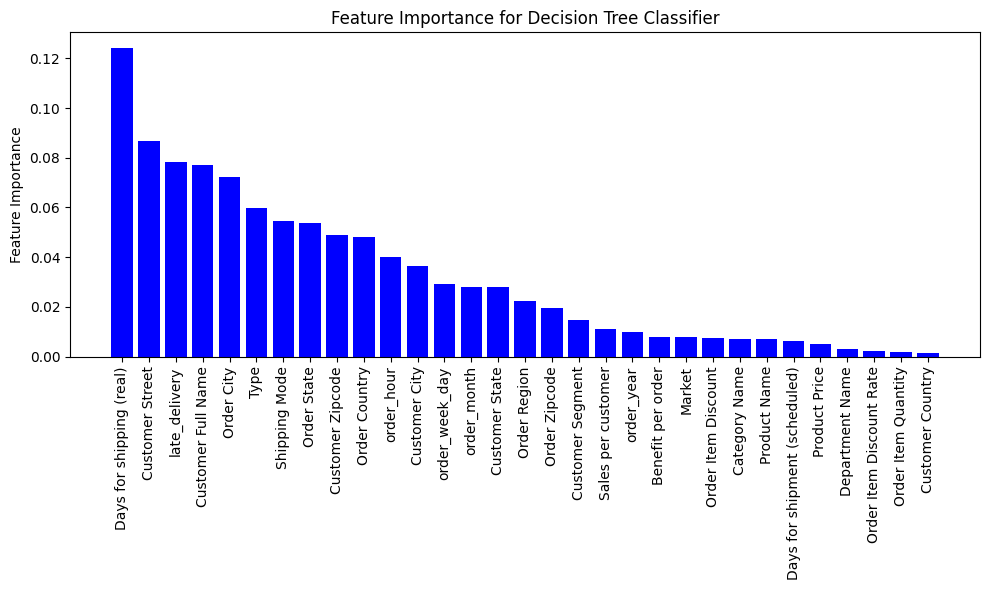

In [335]:
feature_names, feature_importances = zip(*sorted_feature_importance)

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='blue')
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Decision Tree Classifier')
plt.tight_layout()
plt.show()

## **K Nearest Neighbour**

In [327]:
model_f = KNeighborsClassifier(n_neighbors=1)
model_l = KNeighborsClassifier(n_neighbors=1)
classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test)

Model paramters used are : KNeighborsClassifier(n_neighbors=1)
Accuracy of fraud status is        : 98.00576113450033 %
Recall score of fraud status is        : 60.09316770186336 %
Conf Matrix of fraud status is        :
 [[34997   257]
 [  463   387]]
F1 score of fraud status is        : 51.80722891566266 %


## **Random Forest**

In [328]:
model_f = RandomForestClassifier()
model_l = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test)

Model paramters used are : RandomForestClassifier()
Accuracy of fraud status is        : 98.95856414801683 %
Recall score of fraud status is        : 97.59036144578313 %
Conf Matrix of fraud status is        :
 [[35242    12]
 [  364   486]]
F1 score of fraud status is        : 72.10682492581603 %
